<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="250"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="300"/>  
# <center> Higher Diploma in Data Analytics - Boston House Prices Project </center> #
  

___________________________________________

**Module Name**: Machine Learning & Statistics  
**Module Number**: 52954  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
___________________________________________  


## (20%) Describe: ##
Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter [6] notebook that uses descriptive statistics and plots to describe the Boston House Prices [1] dataset. This part is worth 20% of your overall mark.

## Table of Contents##
1. [Introduction](#intro)  
2. [The Boston Dataset](#dataset)  
2.1 [Profile Report](#report)  
2.2 [Plots](#plot)  
2.3 [What Affects House Prices?](#hp)  
3. [The Charles River Effect](#chas)  
3.1 [Outliers](#out)  
3.2 [Re-analysis with Higher End Values Removed](#rean)  
3.3 [Conclusion of Charles River Effect](chas_con)  
4. [Predicting](#pred)  
4.1 [Helper Functions](#help)  
4.2 [Performing the Tests](#test)  
4.3 [Looking at the Results](#results)  
4.4 [Top Performers](#top)  
4.5 [Using the Results](#model)  
5. [Conclusion](#conc)  
6. [References](#refs)  
***

## <a name="intro"></a>1. Introduction ##
This project concerns the Boston House Price Dataset, a dataset that comes with sklearn. For the Machine Learning and STatistics Module of the GMIT Higher Diploma in Data Anayltics, we are tasked with:

* Describing the dataset.
* Looking at wherther proximity to the Charles River has an impact on the house prices.
* Building a model so we could predict house prices.


In [1]:
# First things first - import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts ## not ~available and warnings when tried to install - will wait for now
%matplotlib inline 
# Found this and thought it was worth trying ...
import pandas_profiling

## <a name="dataset"></a> 2. The Boston Dataset
Let's open up the dataset and have a look.

In [2]:
# We need to import the dataset too
from sklearn.datasets import load_boston
bhp = load_boston()

In [3]:
# Lets have a look at what comes with the data
print(bhp.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Lets look at each of the keys to see what they contain.

In [4]:
# See the data
print(bhp.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Unsurprisingly the data holds the raw numbers of the dataset. Let's see the target:

In [5]:
# Show what the target holds
print(bhp.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

This we would assume are the house prices related to each attribute. Next up - feature names

In [6]:
# Show the feature names
print(bhp.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# The DESCR appears interesting, let's see what that is
print(bhp.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

This is very interesting description of the dataset, tracing its history etc. Note that the target values is called MEDV.

In [8]:
# Show the filename information
print(bhp.filename)

C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


Now, having seen what is contained in the dataset, time to put it in a dataframe for processing.

In [9]:
# Put the data in a dataframe for easier manipulation
boston = pd.DataFrame(bhp.data, columns=bhp.feature_names)
# And have a look at some random data
boston.sample(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
323  0.28392   0.0   7.38   0.0  0.493  5.708  74.3  4.7211   5.0  287.0   
322  0.35114   0.0   7.38   0.0  0.493  6.041  49.9  4.7211   5.0  287.0   
305  0.05479  33.0   2.18   0.0  0.472  6.616  58.1  3.3700   7.0  222.0   
139  0.54452   0.0  21.89   0.0  0.624  6.151  97.9  1.6687   4.0  437.0   
424  8.79212   0.0  18.10   0.0  0.584  5.565  70.6  2.0635  24.0  666.0   

     PTRATIO       B  LSTAT  
323     19.6  391.13  11.74  
322     19.6  396.90   7.70  
305     18.4  393.36   8.93  
139     21.2  396.90  18.46  
424     20.2    3.65  17.16

In [10]:
# There is no MEDV column so we must add it to the dataframe
boston["MEDV"] = bhp.target
boston.sample(5)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
399  9.91655  0.0  18.10   0.0  0.693  5.852  77.8  1.5004  24.0  666.0   
471  4.03841  0.0  18.10   0.0  0.532  6.229  90.7  3.0993  24.0  666.0   
467  4.42228  0.0  18.10   0.0  0.584  6.003  94.5  2.5403  24.0  666.0   
449  7.52601  0.0  18.10   0.0  0.713  6.417  98.3  2.1850  24.0  666.0   
113  0.22212  0.0  10.01   0.0  0.547  6.092  95.4  2.5480   6.0  432.0   

     PTRATIO       B  LSTAT  MEDV  
399     20.2  338.16  29.97   6.3  
471     20.2  395.33  12.87  19.6  
467     20.2  331.29  21.32  19.1  
449     20.2  304.21  19.31  13.0  
113     17.8  396.90  17.09  18.7

### <a name= "report"></a>2.1 Profiling Report

In [11]:
# The pandas profiling report give a good pverviw of the dataset.
profile = pandas_profiling.ProfileReport(boston)
profile

The profiling report tells us that there are 50 rows with 14 variables, no missing or duplicate rows. Of the 14 variables, 12 are numeric, one is categorical and one (TAX) was rejected as is had a very high correlation with RAD. Multi=co-linearity can cause problems as variables are assumed to be independent [[19](#19)], _i.e._ if you are looking at the effects of changing one variable only at a time. Where variables are correlated, you cannot just change one variable alone.  
The report then goes through each variable in turn and describes and plots it. Four different correlation matrices are plotted and sample of rows are shown.

In [12]:
# Check the first few rows
boston.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [13]:
# And the last few
boston.tail(5)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

In [14]:
# Check for null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### <a name="plot"></a>2.2 Plotting 

So, what does the data look like? Let's first look at histograms to see where how the data looks.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EA50856A0>,
      dtype=object)

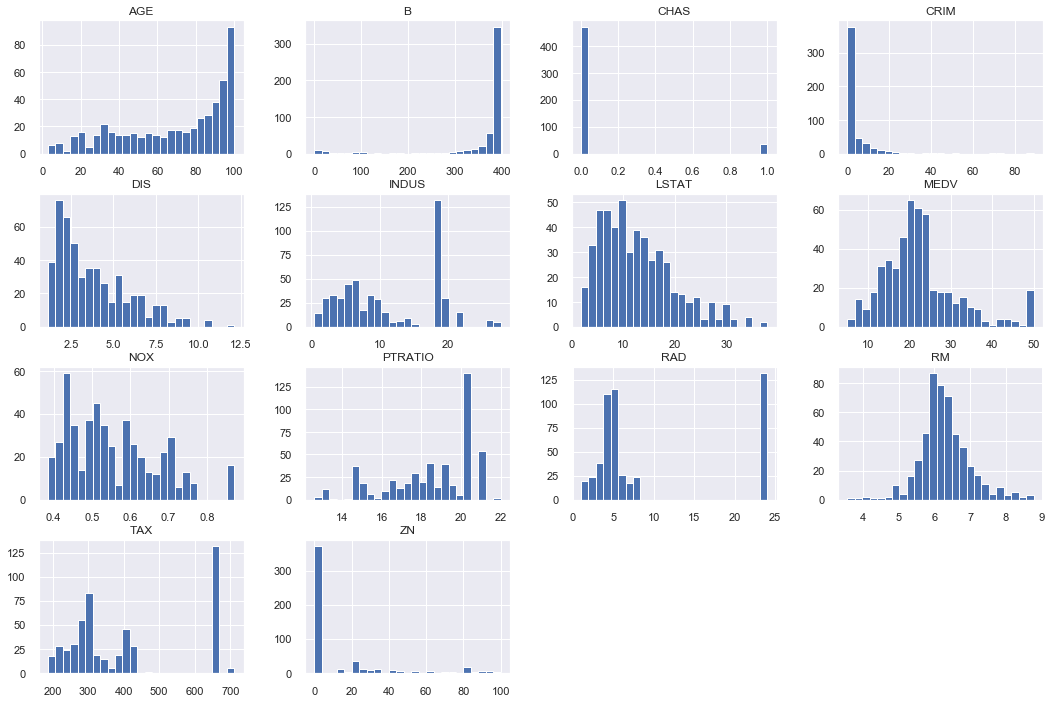

In [97]:
plt.rcParams["figure.figsize"] = [18, 12]
# Just a histogram of each variable to start
boston.hist(bins = 25)

Looking at each of the attributes in isolation we can see that for a few attributes there appears to be a maximum threshold beyond which there are no readings. In particular:
* Age
* B
* MEDV
* NOX
* RAD

Let's see if we are correct in that observation.

In [16]:
# List the "fishy" data
fishy = ["AGE", "B", "MEDV", "NOX", "RAD"]
# Print out the max and the no of rows that have that value
for fish in fishy:
    print(fish, "maximum =", boston[fish].max(), "and there are", boston[boston[fish] == boston[fish].max()][fish].count(), "rows with this value")

AGE maximum = 100.0 and there are 43 rows with this value
B maximum = 396.9 and there are 121 rows with this value
MEDV maximum = 50.0 and there are 16 rows with this value
NOX maximum = 0.871 and there are 16 rows with this value
RAD maximum = 24.0 and there are 132 rows with this value


This somewhat compromises our dataset in that for example you do not know if the maximum value _e.g._ of the MEDV variable is 50.0K or much, much greater. We will re-visit this later.  

As we are primarily interested in house price, lets explore that attribute a bit more.

In [17]:
#Just having a look at the house price element itself
boston["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

### <a name = "hp"></a>2.3 What affects house prices? ###
Need to look at each element individually first to see what affects house prices in particular:  
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population

In [18]:
from scipy import stats
table = []
# for each attribute
for feature in bhp.feature_names:
    # Get the regression lines
    slope, intercept, r2_value, pvalue, stdErr = stats.linregress(boston["MEDV"], boston[feature])
    # Append to a list
    table.append([feature, slope, intercept, r2_value, pvalue, stdErr])

# Create a dataframe with data
dfLinReg = pd.DataFrame(table, columns = ["feature", "slope", "intercept", "r2_value", "pvalue", "stderr"])
dfLinReg

feature     slope   intercept  r2_value        pvalue    stderr
0      CRIM -0.363160   11.796536 -0.388305  1.173987e-19  0.038390
1        ZN  0.914034   -9.232124  0.360445  5.713584e-17  0.105363
2     INDUS -0.360823   19.267130 -0.483725  4.900260e-31  0.029080
3      CHAS  0.004840   -0.039891  0.175260  7.390623e-05  0.001211
4       NOX -0.005384    0.676011 -0.427321  7.065042e-24  0.000507
5        RM  0.053122    5.087639  0.695360  2.487229e-74  0.002446
6       AGE -1.153716   94.571350 -0.376955  1.569982e-18  0.126274
7       DIS  0.057222    2.505669  0.249929  1.206612e-08  0.009875
8       RAD -0.361301   17.690522 -0.381626  5.465933e-19  0.038979
9       TAX -8.585930  601.702260 -0.468536  5.637734e-29  0.721121
10  PTRATIO -0.119530   21.148882 -0.507787  1.609509e-34  0.009033
11        B  3.310092  282.088371  0.333461  1.318113e-14  0.416853
12    LSTAT -0.572756   25.558859 -0.737663  5.081103e-88  0.023351

The dataframe above shows the best correlations with LSTAT (% of population from lower status), which shows an inverse relationship with house price, and RM (number of rooms). This correlates well with the Correlation tables in the profile above. 

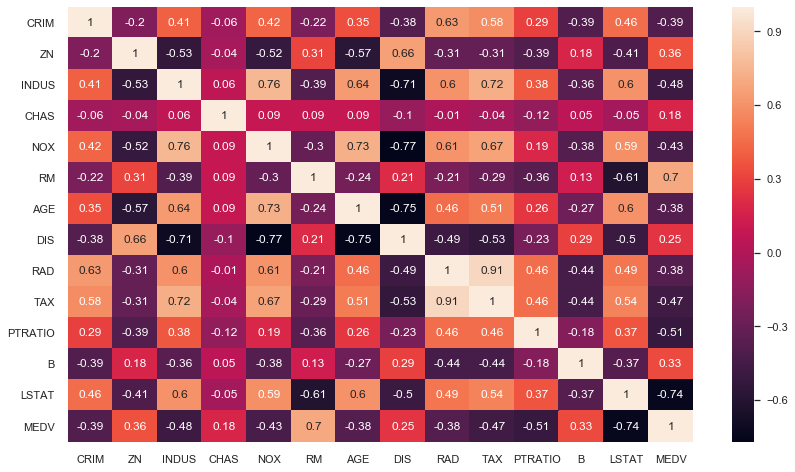

In [19]:
sns.set(rc={'figure.figsize':(14,8)})
# Look at the correlation matrix - tallies well with results above.
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### 2.3.1 Linear Regression

Text(0.5, 0.98, 'Factors Affecting House Prices')

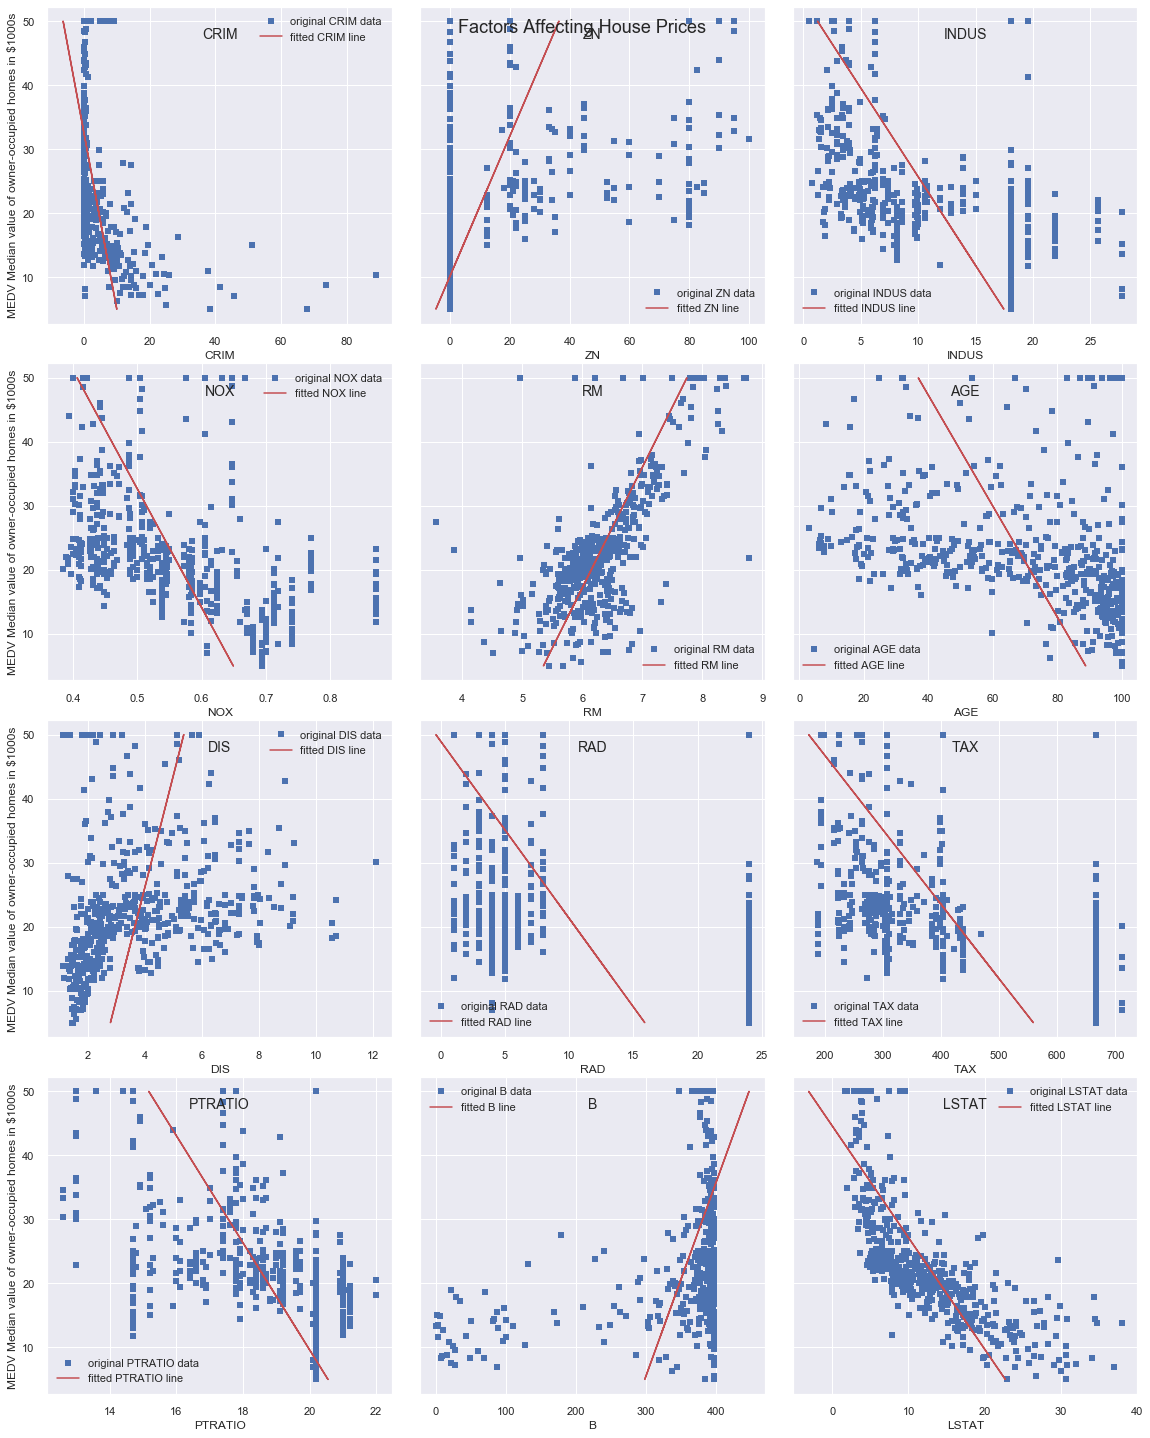

In [20]:
# Setting the plot size
plt.rcParams['figure.figsize'] = [16,20]

# Plot both the raw data and the "best fit" lines
fig, axs = plt.subplots(4, 3, sharey=True)
fig.tight_layout()

# Need two counters here to take care of the fact we are not printing CHAS (1/0 values only)
i, j = 0, 0

# Iterate through the features and plot each one
for feature in bhp.feature_names:
    # Exclude the CHAS and MEDV ones - MEDV we are already plotting against and CHAS as there is only 1 / 0 values
    if feature != "CHAS" and feature != "MEDV":
        # Scatter plot of original data
        axs[divmod(i, 3)].plot(boston[feature], boston["MEDV"], 'bs', label= "original "+ feature + " data")
        # Add the calculated regression line
        axs[divmod(i, 3)].plot(dfLinReg.intercept[j] + dfLinReg.slope[j]*boston["MEDV"], boston["MEDV"], 'r', label="fitted "+ feature +" line")
        # And the legend
        axs[divmod(i, 3)].legend()
        # Add labels for x axis
        axs[divmod(i, 3)].text(.5,.9, feature, horizontalalignment="center",transform=axs[divmod(i, 3)].transAxes,fontsize=14)
        axs[divmod(i, 3)].set_xlabel(feature)
        # Increment the i counter for correct placement of plot
        i +=1
    # Always increment j counter (i not incremented on CHAS)
    j+=1

# Add y-axis labels
axs[0,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[1,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[2,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[3,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')

# Titles
fig.suptitle('Factors Affecting House Prices', fontsize=18)


Looking at the plots individually, we can hypothesise on possible correlations. It is likely many of these supposed correlations will be more imagined than real, but we will explore them nonetheless as this may help us spot fake relationships in the future.  
  
**CRIM**: Within the entire dataset there appears to be no relationship, but may warrant further scrutiny where the crime rate is not 0.  
**ZN**: Similar to the crime rate. We could look at any relationship where the 0 values are excluded.  
**INDUS**: Could look at excluding house prices under \\$40K   
**NOX**: Similar to INDUS, could exclude the higher priced homes. Unsurprisingly this plot tallies with the INDUS plot.   
**RM**:  A clear linear proportional relationship exists.  
**AGE**: Possible relationship excluding the higher priced homes.  
**DIS**: There may be a $y = a \sqrt{x} $ relationship  
**RAD**: Struggling to find any kind of relationship here.  
**TAX**: Again, no obvious relationship barring a general trend toward higher taxes meaning lower house prices, but the data values are very spread for this to pursue.  
**PTRATIO**: Similar to the TAX plot above  
**B**: Could look at relationship excluding upper-end B values  
**LSTAT**: While this shows one of the best $r^2$ values the shape of the graph may warrant whether a $y=\frac{1}{x}$ may be a better fit here.

It is likely that many of these relationships are not worthy of further investigation.

#### 2.3.2 Investigation of adjustments described above

In [21]:
boston_nocrim = boston.loc[boston.CRIM > 2]
boston_nozn = boston.loc[boston.ZN>5]

In [22]:
crim0_slope, crim0_intercept, crim0_r2, crim0_p, crim0_stdErr = stats.linregress(boston_nocrim["MEDV"], boston_nocrim["CRIM"])
zn0_slope, zn0_intercept, zn0_r2, zn0_p, zn0_stdErr = stats.linregress(boston_nozn["MEDV"], boston_nozn["ZN"])


In [23]:
print("Full dataset r^2 values for CRIM (", len(boston),") vs adjusted CRIM (", len(boston_nocrim),"):", dfLinReg[dfLinReg.feature == "CRIM"].r2_value.item(), "vs",crim0_r2)
print("Full dataset r^2 values for ZN (", len(boston),") vs adjusted ZN (", len(boston_nozn),"):", dfLinReg.r2_value[dfLinReg.feature == "ZN"].item(), "vs", zn0_r2)


Full dataset r^2 values for CRIM ( 506 ) vs adjusted CRIM ( 150 ): -0.3883046085868113 vs -0.3486104206965284
Full dataset r^2 values for ZN ( 506 ) vs adjusted ZN ( 134 ): 0.3604453424505433 vs 0.20841302081053192


So reducing the dataset to get better correlation with CRIM and ZN actually worsened the $r^2$ values in both scenarios!

In [24]:
altBoston = boston.loc[boston.MEDV < 40.0]
altIndus_slope, altIndus_intercept, altIndus_r2, altIndus_p, altIndus_stdErr = stats.linregress(altBoston["MEDV"], altBoston["INDUS"])
altNox_slope, altNox_intercept, altNox_r2, altNox_p, altNox_stdErr = stats.linregress(altBoston["MEDV"], altBoston["NOX"])
altAge_slope, altAge_intercept, altAge_r2, altAge_p, altAge_stdErr = stats.linregress(altBoston["MEDV"], altBoston["AGE"])


In [25]:
print("Full dataset r^2 values for INDUS (", len(boston),") vs adjusted INDUS (", len(altBoston),"):", dfLinReg[dfLinReg.feature == "INDUS"].r2_value.item(), "vs",altIndus_r2)
print("Full dataset r^2 values for NOX (", len(boston),") vs adjusted NOX (", len(altBoston),"):", dfLinReg.r2_value[dfLinReg.feature == "NOX"].item(), "vs", altNox_r2)
print("Full dataset r^2 values for AGE (", len(boston),") vs adjusted AGE (", len(altBoston),"):", dfLinReg.r2_value[dfLinReg.feature == "AGE"].item(), "vs", altAge_r2)


Full dataset r^2 values for INDUS ( 506 ) vs adjusted INDUS ( 475 ): -0.48372516002837285 vs -0.6208291345688333
Full dataset r^2 values for NOX ( 506 ) vs adjusted NOX ( 475 ): -0.4273207723732824 vs -0.5706001063429771
Full dataset r^2 values for AGE ( 506 ) vs adjusted AGE ( 475 ): -0.37695456500459606 vs -0.5350579000220633


The reduced dataset for the INDUS, NOX and AGE attributes improved the $r^2$ values.

#### 2.3.3 Multi-Linear Regression  
Looking at the two variables, RM and LSTAT - try using multi-linear regression

In [26]:
# Import linear_model from sklearn
import sklearn.linear_model as ln

In [27]:
# Create a linear regression model instance
m = ln.LinearRegression()

In [28]:
x = boston[["RM","LSTAT"]] # comparing against the best two variables
y = boston.MEDV

In [29]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# See how well it fit:
print("Score of RM alone", dfLinReg.r2_value[dfLinReg.feature == "RM"].item())
print("Score of LSTAT alone", dfLinReg.r2_value[dfLinReg.feature == "LSTAT"].item())
print("Score when both are used together",m.score(x,y))

Score of RM alone 0.695359947071539
Score of LSTAT alone -0.7376627261740147
Score when both are used together 0.6385616062603403


This value is lower than either the RM or LSTAT R2 values!

In [31]:
x = boston[["RM", "INDUS"]]
m.fit(x,y)
print("Score of RM alone", dfLinReg.r2_value[dfLinReg.feature == "RM"].item())
print("Score of INDUS alone", dfLinReg.r2_value[dfLinReg.feature == "INDUS"].item())
print("Score when both are used together",m.score(x,y))

Score of RM alone 0.695359947071539
Score of INDUS alone -0.48372516002837285
Score when both are used together 0.5362984005856312


In [32]:
x = boston[["LSTAT", "INDUS"]]
m.fit(x,y)
print("Score of LSTAT alone", dfLinReg.r2_value[dfLinReg.feature == "LSTAT"].item())
print("Score of INDUS alone", dfLinReg.r2_value[dfLinReg.feature == "INDUS"].item())
print("Score when both are used together",m.score(x,y))

Score of LSTAT alone -0.7376627261740147
Score of INDUS alone -0.48372516002837285
Score when both are used together 0.5464577805111691


So far the best regression $r^2$ values may be seen using the LSTAT and RM variables - separately. We will revist these later when we go to predict.

### <a name = "chas"></a>3. The Charles River Effect
A requirement of this project was to look at the effect of the CHAS attribute which indicates proximity to the Charles River. We want to investigate to see if there is a significant difference in median house prices between houses that are along the Charles river and those that are not.  
<img src="images/Charles-River.jpg"/>

First lets look at the data in both cases:

In [81]:
# Let's have a look at the stats for properties beside the Charles River
boston.loc[boston.CHAS == 1].describe().transpose() # Transposed because it is easier to see

count        mean         std        min        25%        50%  \
CRIM      35.0    1.851670    2.494072    0.01501    0.12506    0.44791   
ZN        35.0    7.714286   18.800143    0.00000    0.00000    0.00000   
INDUS     35.0   12.719143    5.957623    1.21000    6.41000   13.89000   
CHAS      35.0    1.000000    0.000000    1.00000    1.00000    1.00000   
NOX       35.0    0.593426    0.144736    0.40100    0.48900    0.55000   
RM        35.0    6.519600    0.876416    5.01200    5.93550    6.25000   
AGE       35.0   77.500000   22.021340   24.80000   60.30000   88.50000   
DIS       35.0    3.029709    1.254728    1.12960    1.90470    3.04800   
RAD       35.0    9.314286    8.248962    1.00000    4.00000    5.00000   
TAX       35.0  386.257143  165.012004  198.00000  276.00000  307.00000   
PTRATIO   35.0   17.491429    2.081766   13.60000   15.65000   17.60000   
B         35.0  372.997429   53.382820   88.01000  376.20000  390.77000   
LSTAT     35.0   11.241714    6.686651    1.92000    5.39500   10.50000   
MEDV      35.0   28.440000   11.816643   13.40000   21.10000   23.30000   

                75%        max  
CRIM       3.397665    8.98296  
ZN         0.000000   90.00000  
INDUS     18.100000   19.58000  
CHAS       1.000000    1.00000  
NOX        0.693000    0.87100  
RM         6.915000    8.78000  
AGE       93.200000  100.00000  
DIS        3.897300    5.88500  
RAD        8.000000   24.00000  
TAX      403.000000  666.00000  
PTRATIO   18.600000   20.20000  
B        393.595000  396.90000  
LSTAT     15.070000   26.82000  
MEDV      33.150000   50.00000

In [82]:
# Let#'s have a look at the stats for properties not beside the Charles River
boston.loc[boston.CHAS == 0].describe().transpose() # Transposed because it is easier to see

count        mean         std        min        25%        50%  \
CRIM     471.0    3.744447    8.876818    0.00632    0.07964    0.24522   
ZN       471.0   11.634820   23.617979    0.00000    0.00000    0.00000   
INDUS    471.0   11.019193    6.913850    0.46000    5.04000    8.56000   
CHAS     471.0    0.000000    0.000000    0.00000    0.00000    0.00000   
NOX      471.0    0.551817    0.113102    0.38500    0.44800    0.53800   
RM       471.0    6.267174    0.685895    3.56100    5.88200    6.20200   
AGE      471.0   67.911677   28.458924    2.90000   42.50000   76.50000   
DIS      471.0    3.851915    2.145567    1.13700    2.10525    3.21570   
RAD      471.0    9.566879    8.748452    1.00000    4.00000    5.00000   
TAX      471.0  409.870488  168.853790  187.00000  282.50000  330.00000   
PTRATIO  471.0   18.527176    2.155958   12.60000   17.40000   19.10000   
B        471.0  355.461040   93.423542    0.32000  375.36500  391.83000   
LSTAT    471.0   12.757941    7.169271    1.73000    7.16000   11.38000   
MEDV     471.0   22.093843    8.831362    5.00000   16.60000   20.90000   

               75%       max  
CRIM       3.69503   88.9762  
ZN        12.50000  100.0000  
INDUS     18.10000   27.7400  
CHAS       0.00000    0.0000  
NOX        0.62400    0.8710  
RM         6.59400    8.7250  
AGE       94.10000  100.0000  
DIS        5.28730   12.1265  
RAD       24.00000   24.0000  
TAX      666.00000  711.0000  
PTRATIO   20.20000   22.0000  
B        396.37500  396.9000  
LSTAT     17.09500   37.9700  
MEDV      24.80000   50.0000

In [35]:
# The dataset pertaining to CHAS
boston.loc[boston.CHAS == 1]

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
211  0.37578   0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
212  0.21719   0.0  10.59   1.0  0.4890  5.807   53.8  3.6526   4.0  277.0   
216  0.04560   0.0  13.89   1.0  0.5500  5.888   56.0  3.1121   5.0  276.0   
218  0.11069   0.0  13.89   1.0  0.5500  5.951   93.8  2.8893   5.0  276.0   
219  0.11425   0.0  13.89   1.0  0.5500  6.373   92.4  3.3633   5.0  276.0   
220  0.35809   0.0   6.20   1.0  0.5070  6.951   88.5  2.8617   8.0  307.0   
221  0.40771   0.0   6.20   1.0  0.5070  6.164   91.3  3.0480   8.0  307.0   
222  0.62356   0.0   6.20   1.0  0.5070  6.879   77.7  3.2721   8.0  307.0   
234  0.44791   0.0   6.20   1.0  0.5070  6.726   66.5  3.6519   8.0  307.0   
236  0.52058   0.0   6.20   1.0  0.5070  6.631   76.5  4.1480   8.0  307.0   
269  0.09065  20.0   6.96   1.0  0.4640  5.920   61.5  3.9175   3.0  223.0   
273  0.22188  20.0   6.96   1.0  0.4640  7.691   51.8  4.3665   3.0  223.0   
274  0.05644  40.0   6.41   1.0  0.4470  6.758   32.9  4.0776   4.0  254.0   
276  0.10469  40.0   6.41   1.0  0.4470  7.267   49.0  4.7872   4.0  254.0   
277  0.06127  40.0   6.41   1.0  0.4470  6.826   27.6  4.8628   4.0  254.0   
282  0.06129  20.0   3.33   1.0  0.4429  7.645   49.7  5.2119   5.0  216.0   
283  0.01501  90.0   1.21   1.0  0.4010  7.923   24.8  5.8850   1.0  198.0   
356  8.98296   0.0  18.10   1.0  0.7700  6.212   97.4  2.1222  24.0  666.0   
357  3.84970   0.0  18.10   1.0  0.7700  6.395   91.0  2.5052  24.0  666.0   
358  5.20177   0.0  18.10   1.0  0.7700  6.127   83.4  2.7227  24.0  666.0   
363  4.22239   0.0  18.10   1.0  0.7700  5.803   89.0  1.9047  24.0  666.0   
364  3.47428   0.0  18.10   1.0  0.7180  8.780   82.9  1.9047  24.0  666.0   
369  5.66998   0.0  18.10   1.0  0.6310  6.683   96.8  1.3567  24.0  666.0   
370  6.53876   0.0  18.10   1.0  0.6310  7.016   97.5  1.2024  24.0  666.0   
372  8.26725   0.0  18.10   1.0  0.6680  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
142     14.7  396.90  26.82  13.4  
152     14.7  343.28  12.12  15.3  
154     14.7  321.02  15.12  17.0  
155     14.7   88.01  15.02  15.6  
160     14.7  338.92   5.50  27.0  
162     14.7  389.61   1.92  50.0  
163     14.7  388.45   3.32  50.0  
208     18.6  381.32  14.66  24.4  
209     18.6  396.90  23.09  20.0  
210     18.6  393.25  17.27  21.7  
211     18.6  395.24  23.98  19.3  
212     18.6  390.94  16.03  22.4  
216     16.4  392.80  13.51  23.3  
218     16.4  396.90  17.92  21.5  
219     16.4  393.74  10.50  23.0  
220     17.4  391.70   9.71  26.7  
221     17.4  395.24  21.46  21.7  
222     17.4  390.39   9.93  27.5  
234     17.4  360.20   8.05  29.0  
236     17.4  388.45   9.54  25.1  
269     18.6  391.34  13.65  20.7  
273     18.6  390.77   6.58  35.2  
274     17.6  396.90   3.53  32.4  
276     17.6  389.25   6.05  33.2  
277     17.6  393.45   4.16  33.1  
282     14.9  377.07   3.01  46.0  
283     13.6  395.52   3.16  50.0  
356     20.2  377.73  17.60  17.8  
357     20.2  391.34  13.27  21.7  
358     20.2  395.43  11.48  22.7  
363     20.2  353.04  14.64  16.8  
364     20.2  354.55   5.29  21.9  
369     20.

In [36]:
# And the one where the houses are not adjacent to Charles River
boston.loc[boston.CHAS == 0]

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

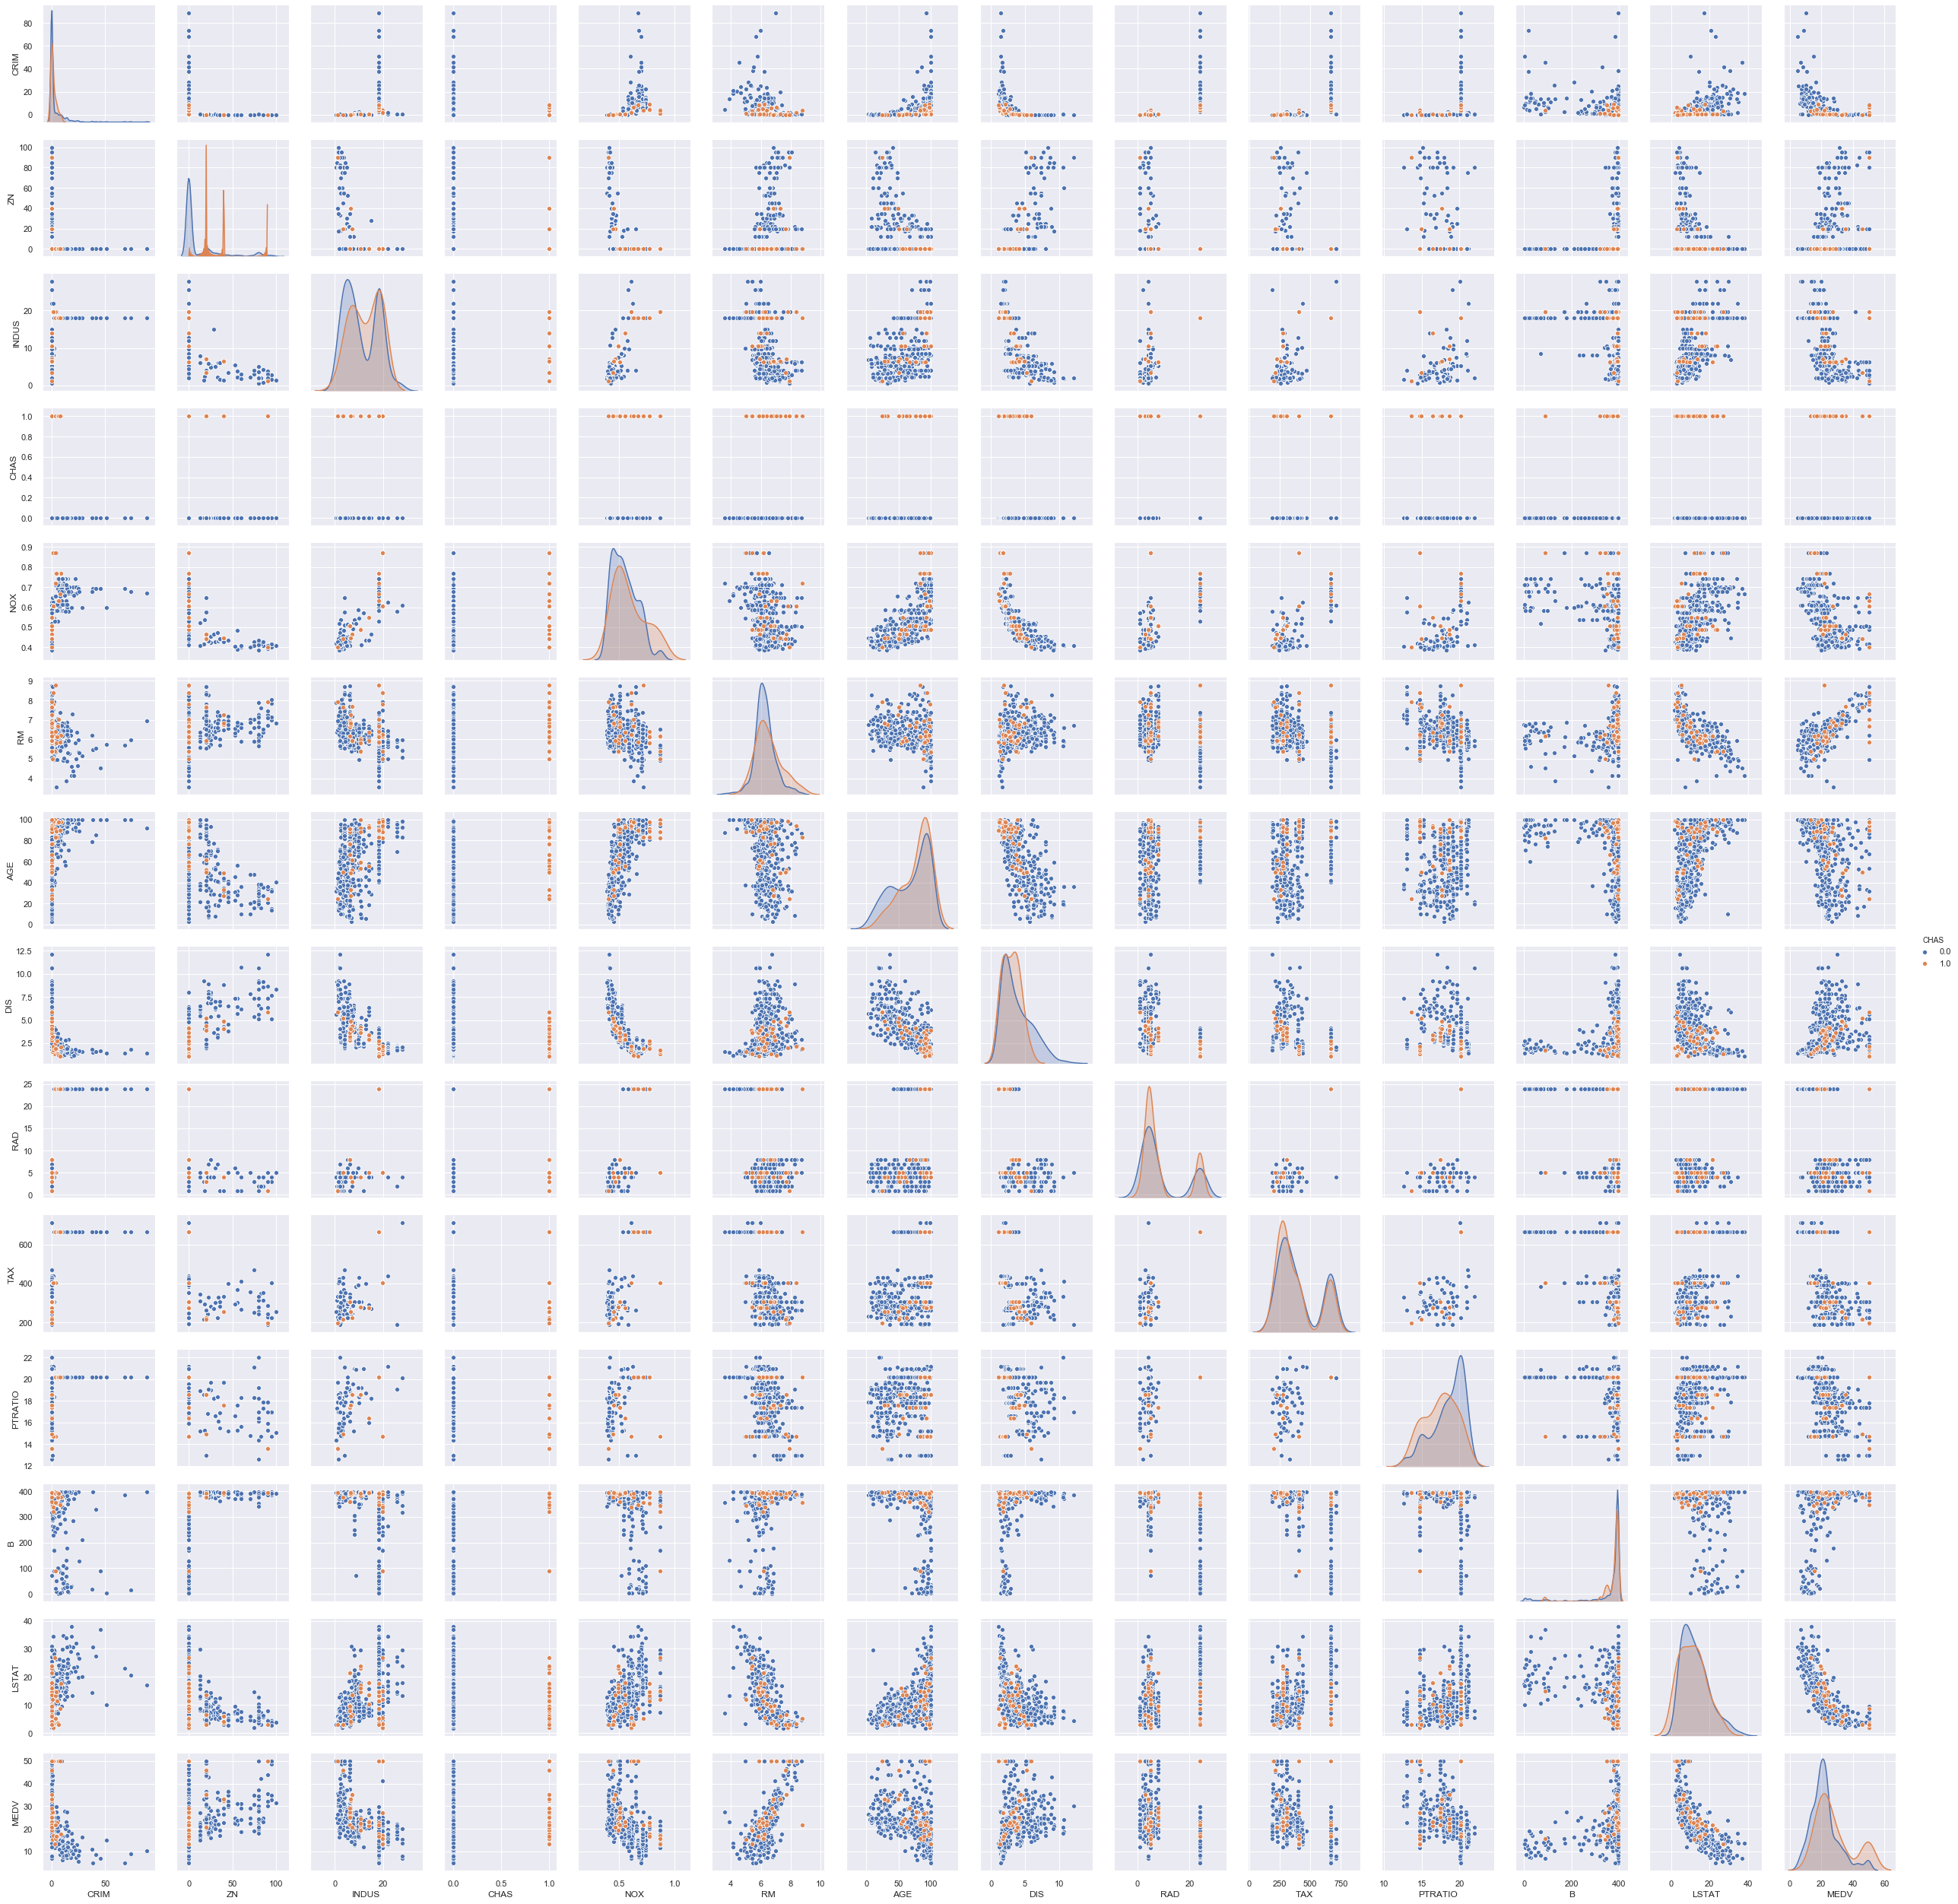

In [37]:
# A 14 x14 plot! 
sns.pairplot(boston, hue = "CHAS")

0.0         AxesSubplot(0.1,0.15;0.363636x0.75)
1.0    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

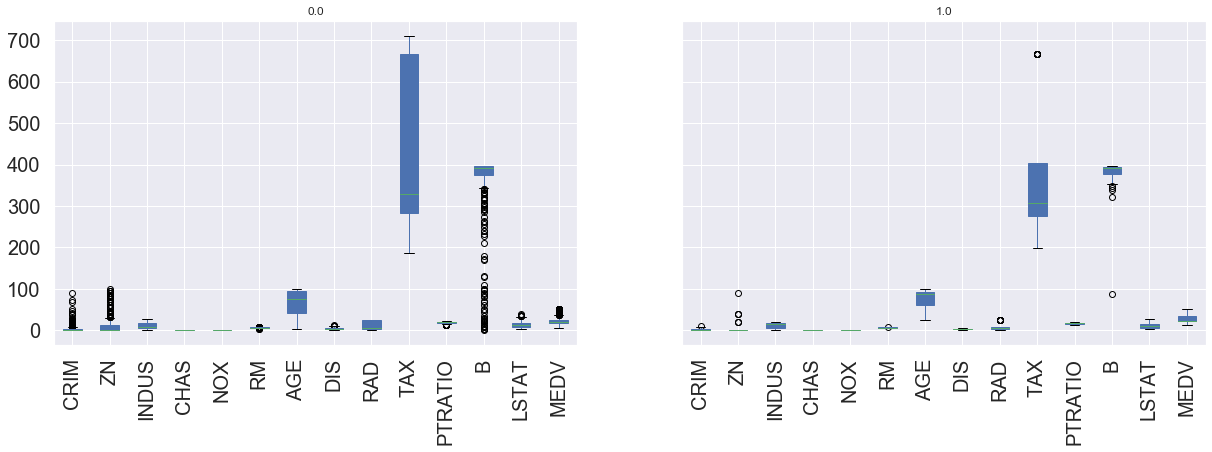

In [98]:
# Do two boxplots of all the attributes based on whether they are fro row adjacent to the Charles River or not
boston.groupby('CHAS').boxplot(fontsize=20,rot=90,figsize=(20,6),patch_artist=True)

While the above have plenty of data - it is hard to see the wood for the trees, so instead lets do the same, except this time only concentrating on the CHAS and MEDV attributes.

In [39]:
# Some stats on the MEDV data where the houses are not adjacent to the river
boston.MEDV.where(boston.CHAS == 0.0).describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [40]:
# Some stats on the MEDV data where the houses are adjacent to the river
boston.MEDV.where(boston.CHAS == 1.0).describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

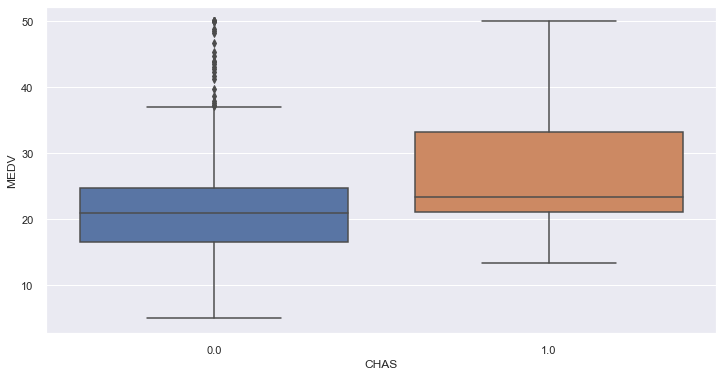

In [83]:
plt.rcParams['figure.figsize'] = [12, 6]
# Grouped boxplot
sns.boxplot(x = "CHAS", y = "MEDV", data = boston, )
#sns.plt.show()

This is perhaps the most obvious one where you can clearly see the difference between house prices between the two groups. The group next to the Charles River appears much higher, although there are many outliers on the upper end of the scale in those houses not adjacent to the river.

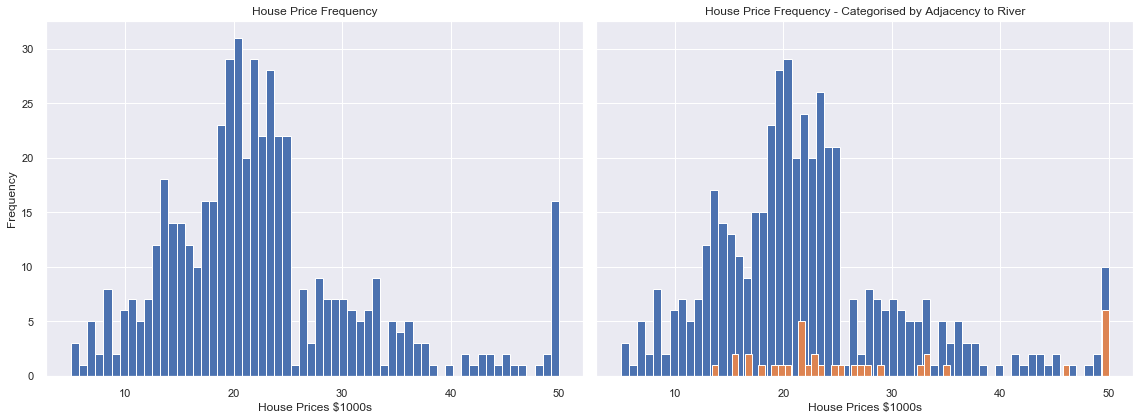

In [42]:
# Plotting histograms showing House Prices in total 
# and where the zone is beside the river
plt.rcParams['figure.figsize'] = [16, 6]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].set_xlabel('House Prices $1000s')
axs[1].set_xlabel('House Prices $1000s')
axs[0].set_ylabel('Frequency')
axs[0].set_title("House Price Frequency")
axs[1].set_title("House Price Frequency - Categorised by Adjacency to River")
axs[0].hist(boston.MEDV, bins = 60)
axs[1].hist(boston.MEDV.where(boston.CHAS == 0.0), bins = 60)
axs[1].hist(boston.MEDV.where(boston.CHAS == 1.0), bins = 60)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Looking at the stats there and particularly the boxplots, it is clear that those houses adjacent to the river are higher in price (with a mean of \\$28K) than those non-adjacent houses(with a mean of \\$22K), although there is more of a spread in the non-adjacent.  

There are only 35 of the 506 houses deemed adjacent to the river, which equates to 6.9% of all houses.  

Looking at the histogram showing the distribution of the prices, we can see that the are a large amount of houses priced at the upper limit for both sets of data. The ones for adjacency to the Charles River appear to be over half of those non-adjacent properties, which is completely at odd with the 6.9% of total properties.

In [43]:
print("The % of houses at $50K with CHAS = 0 is", round(boston.MEDV.where((boston.MEDV == 50.0) &(boston.CHAS == 0.0)).count()*100/boston.loc[boston.CHAS == 0].MEDV.count(),2),"%")
print("The % of houses at $50K with CHAS = 1 is", round(boston.MEDV.where((boston.MEDV == 50.0) &(boston.CHAS == 1.0)).count()*100/boston.loc[boston.CHAS == 1].MEDV.count(),2),"%")

The % of houses at $50K with CHAS = 0 is 2.12 %
The % of houses at $50K with CHAS = 1 is 17.14 %


This shows a clear difference between the two attribute values. As we have seen earlier though - it is best to check it with actual mathematics! Lets perform a T-test.

In [44]:
# Perform t-test on the two datasets:
import scipy.stats as stats
stats.ttest_ind(boston.loc[boston.CHAS == 1].MEDV, boston.loc[boston.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The result above would indicate that these datasets were distinctly different with only a very small probability of the two being confused (p-value of $7.4 x 10^{-5}$). We can therefore reject the null hypothesis that the two datasets are the same and state that in fact they are statistically different from each other.

But what happens if, as we saw earlier, we thought that the MEDV values had a cap of \\$50K and we decided to exclude them? For convenience sake we will use the altBoston dataframe we create earlier.

In [45]:
# Perform t-test on the two amended datasets:
stats.ttest_ind(altBoston.loc[altBoston.CHAS ==1.0].MEDV, altBoston.loc[altBoston.CHAS == 0.0].MEDV)

Ttest_indResult(statistic=1.8389265568521393, pvalue=0.06655266530833404)

So, now with the reduced dataset the p value has massively increased to a point where we can no longer reject the null hypothesis that the two datasets are indistinguishable as there is much overlap between the two.

### <a name="out"></a>3.1 Outliers  
It is clear from the analysis to date that there appears to be a problem with the data at the higher end of the MEDV pricing. The upper limit of values appears capped at $50K. 

In [84]:
print(f"The number of rows with a MEDV value of $50K is {len(boston.loc[boston.MEDV == 50.0])}, which represents {np.round(len(boston.loc[boston.MEDV == 50.0])*100/len(boston),2)}% of the values")

The number of rows with a MEDV value of $50K is 16, which represents 3.16% of the values


In [47]:
# List the top 5 most frequent house prices
boston.MEDV.value_counts().head()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
Name: MEDV, dtype: int64

This is at twice the frequency of any and every other value. It is likely that there was a cap put on the upper end of the MEDV values and as such this contaminates the dataset. We have no way of knowing if the \\$50K is really \\$50K or \\$50M or more. There is an argument to be made therefore, to exclude these values from further analysis.   

We could do this in a number of ways.
Rather than just pick on this value we will exclude values that fall outside two standard deviations of the mean. This should to exclude any other less obvious issues.

In [48]:
# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))]
    #df.drop(drop_rows, axis=0, inplace=True)
    return df.drop(drop_rows, axis=0)

In [49]:
dfNoOut = remove_outliers(boston, "MEDV", 2)

So how does this affect our list of "fishy" data?

In [50]:
# Print out the max and the no of rows that have that value
for fish in fishy:
    print("Before:",fish, "maximum =", boston[fish].max(), "and there are", boston[boston[fish] == boston[fish].max()][fish].count(), "rows with this value")
    print("After:",fish, "maximum =", dfNoOut[fish].max(), "and there are", dfNoOut[dfNoOut[fish] == dfNoOut[fish].max()][fish].count(), "rows with this value")
    print()

Before: AGE maximum = 100.0 and there are 43 rows with this value
After: AGE maximum = 100.0 and there are 41 rows with this value

Before: B maximum = 396.9 and there are 121 rows with this value
After: B maximum = 396.9 and there are 120 rows with this value

Before: MEDV maximum = 50.0 and there are 16 rows with this value
After: MEDV maximum = 39.8 and there are 1 rows with this value

Before: NOX maximum = 0.871 and there are 16 rows with this value
After: NOX maximum = 0.871 and there are 16 rows with this value

Before: RAD maximum = 24.0 and there are 132 rows with this value
After: RAD maximum = 24.0 and there are 127 rows with this value



Well, the answer is - not much! The effect of removing the MEDV outliers only substantially affected the MEDV maxima value counts.  

What happens if we remove all outliers?

In [52]:
dfNoAllOut = remove_outliers(dfNoOut, "AGE", 2)

In [53]:
dfNoAllOut.shape

(462, 14)

In [54]:
# Print out the max and the no of rows that have that value
for fish in fishy:
    print("Before:",fish, "maximum =", boston[fish].max(), "and there are", boston[boston[fish] == boston[fish].max()][fish].count(), "rows with this value")
    print("After:",fish, "maximum =", dfNoAllOut[fish].max(), "and there are", dfNoAllOut[dfNoAllOut[fish] == dfNoAllOut[fish].max()][fish].count(), "rows with this value")
    print()


Before: AGE maximum = 100.0 and there are 43 rows with this value
After: AGE maximum = 100.0 and there are 41 rows with this value

Before: B maximum = 396.9 and there are 121 rows with this value
After: B maximum = 396.9 and there are 120 rows with this value

Before: MEDV maximum = 50.0 and there are 16 rows with this value
After: MEDV maximum = 39.8 and there are 1 rows with this value

Before: NOX maximum = 0.871 and there are 16 rows with this value
After: NOX maximum = 0.871 and there are 16 rows with this value

Before: RAD maximum = 24.0 and there are 132 rows with this value
After: RAD maximum = 24.0 and there are 127 rows with this value



In [89]:
print("The Mean AGE is",round(boston.AGE.mean(),2), "with a standard deviation of", round(boston.AGE.std(),2))

The Mean AGE is 68.57 with a standard deviation of 28.15


Again, not much has changed, even the maximum age remains the same, why is that? Well, we are defining an outlier in our function as a value outside of a number (in this case 2) standard deviations away from the mean. In the case of the AGE attribute, the upper cap of 100 is within that range and therefore NOT an outlier.  

So how does that affect our MEDV calculations? Well the MEDV values are capped at \\$50K, but there does not appear to be any lower end cap. We have to assume the lower end values are correctly recorded and therefore should remain as part of our dataset. We will look however on the altBoston dataframe we created which excluded the higher end values in more detail.

### <a name="rean"></a> 3.2 Re-analysis with Higher End Values Removed

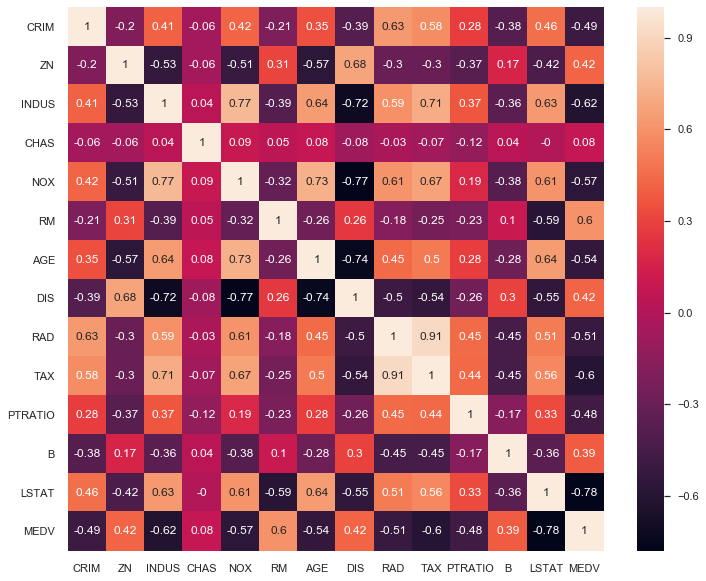

In [90]:
sns.set(rc={'figure.figsize':(12,10)})
# Look at the correlation matrix - tallies well with results above.
correlation_matrix = altBoston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [91]:
table = []
# for each attribute
for feature in bhp.feature_names:
    # Get the regression lines
    slope, intercept, r2_value, pvalue, stdErr = stats.linregress(altBoston.MEDV, altBoston[feature])
    # Append to a list
    table.append([feature, slope, intercept, r2_value, pvalue, stdErr])

# Create a dataframe with data
dfLinRegNoOut = pd.DataFrame(table, columns =["feature", "slope", "intercept", "rvalue", "pvalue", "stderr"])
dfLinRegNoOut

feature      slope   intercept    rvalue        pvalue    stderr
0      CRIM  -0.634937   17.022176 -0.488403  7.628529e-30  0.052161
1        ZN   1.375152  -18.106493  0.419465  1.148938e-21  0.136836
2     INDUS  -0.621985   24.298869 -0.620829  5.850405e-52  0.036113
3      CHAS   0.002922   -0.002137  0.084253  6.655267e-02  0.001589
4       NOX  -0.009836    0.761699 -0.570600  2.225569e-42  0.000651
5        RM   0.052744    5.092991  0.602755  2.575552e-48  0.003210
6       AGE  -2.207306  114.871740 -0.535058  1.555852e-36  0.160248
7       DIS   0.131007    1.084143  0.420821  8.255994e-22  0.012985
8       RAD  -0.659000   23.423726 -0.509836  8.648501e-33  0.051128
9       TAX -14.841161  722.159228 -0.597001  3.331663e-47  0.916994
10  PTRATIO  -0.145814   21.657525 -0.482575  4.447209e-29  0.012168
11        B   5.447332  241.027793  0.394322  4.032920e-19  0.583720
12    LSTAT  -0.798801   29.907440 -0.775144  2.204319e-96  0.029936

Removing the higher end MEDV values has a significant effect on the correlation coefficients with respect to MEDV. Previously, with all data included only LSTAT (-0.74), RM (0.7) and PTRATIO (-0.51) had absolute coefficients greater than 0.5. With the amended data INDUS(-0.62), NOX(-0.57), AGE (-0.54), RAD(-0.51), TAX (-0.6) are also included in that list. Interestingly however PTRATIO has decreased to -0.48 and RM, one of the two most highly correlated variables has decreased to 0.6 from 0.7.

Text(0.5, 0.98, 'Factors Affecting House Prices')

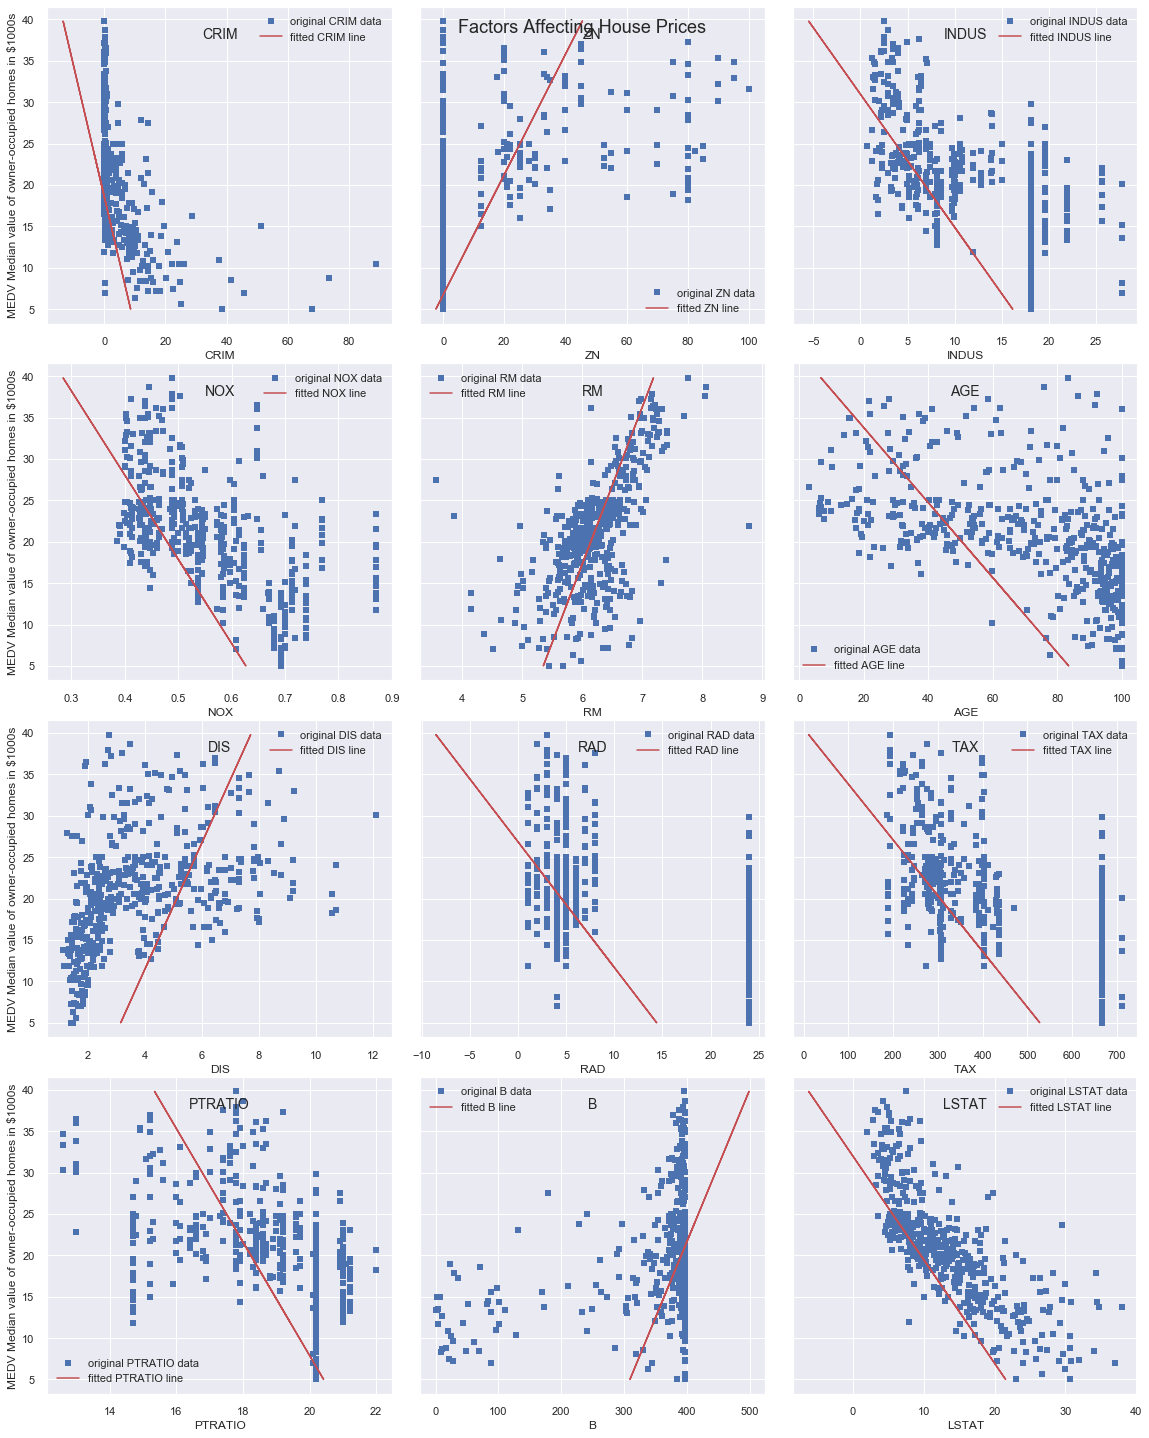

In [93]:
# Setting the plot size
plt.rcParams['figure.figsize'] = [16,20]

# Plot both the raw data and the "best fit" lines
fig, axs = plt.subplots(4, 3, sharey=True)
fig.tight_layout()

# Need two counters here to take care of the fact we are not printing CHAS (1/0 values only)
i= 0

# Iterate through the features and plot each one
for feature in bhp.feature_names:
    # Exclude the CHAS and MEDV ones - MEDV we are already plotting against and CHAS as there is only 1 / 0 values
    if feature != "CHAS" and feature != "MEDV":
        # Scatter plot of original data
        axs[divmod(i, 3)].plot(altBoston[feature], altBoston.MEDV, 'bs', label= "original "+ feature + " data")
        # Add the calculated regression line
        axs[divmod(i, 3)].plot(dfLinReg.intercept[dfLinRegNoOut.feature == feature].item() + dfLinRegNoOut.slope[dfLinRegNoOut.feature == feature].item()*altBoston.MEDV, altBoston.MEDV, 'r', label="fitted "+ feature +" line")
        # And the legend
        axs[divmod(i, 3)].legend()
        # Add labels for x axis
        axs[divmod(i, 3)].text(.5,.9, feature, horizontalalignment="center",transform=axs[divmod(i, 3)].transAxes,fontsize=14)
        axs[divmod(i, 3)].set_xlabel(feature)
        # Increment the i counter for correct placement of plot
        i +=1

# Add y-axis labels
axs[0,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[1,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[2,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[3,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')

# Titles
fig.suptitle('Factors Affecting House Prices', fontsize=18)


In [94]:
# Perform t-test on the with outliers removed:
stats.ttest_ind(altBoston.loc[altBoston.CHAS < 1].MEDV,altBoston.loc[altBoston.CHAS == 1.0].MEDV)

Ttest_indResult(statistic=-1.8389265568521393, pvalue=0.06655266530833404)

With the outliers removed - it is not possible to distinguish the two datasets.  

### <a name="chas_con"></a> 3.3 Conclusion of CHAS Variable Analysis 
On first appearances the it looks like the proximity a house to the Charles River does appear to have an effect on the house price in that those next to the river are higher in value. Working on the complete dataset this difference is highly significant when a T-Test is performed. 

On closer examination however, it is noticed the appears to be a cap on the MEDV values of \\$50K. The affect of this cap means that we cannot know what the actual price of houses marked as \\$50K - they could be indeed \\$50K or they could be \\$1M. We cannot say.  

If we remove these higher value houses from the dataset, there is no statistical difference between the two sets of MEDV values.  

There are a number of assumptions made when performing a T-Test [[25](#25)], namely:
* The scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.  
* The sample used is representative of the population as a whole.  
* The data has a normal distribution, bell-shaped distribution curve.  
* A reasonably large sample size is used - larger sizes means the distribution of results should approach a normal distribution.  
* Homogeneity of variance - equal variance exists when the standard deviations of samples are approximately equal.  

The distribution of the data in this instance is not a normal distribution.  

In conclusion, although described in the dataset as a dummy value, the CHAS values can tell us a lot about data analysis. Never blindly do testing without first looking at the dataset. The histogram shows the problem with the ceiling on the MEDV values very clearly. Also do not neglect to test any assumptions a test makes before performing the test on the data. Finally, with respect to the effect proximity to the Charles River has on house prices - we can only say it is inconclusive based on the data given.

## 4. Predicting <a name="pred"></a>

<img align="right" src="images/nn.png" alt="Neural Nework" width="500"/>  Machine learning is achieved with Keras by building neural networks. The building block of any network begins with a single neuron or node as shown in the diagram (a) [[23](#23)].  

Any variable that may be needed to predict the end value, MEDV value in our case, is considered an input and shown as $x_i$ in the diagram. Every input has an associated weight $w_i$. All of these weighted inputs are added together and passed through an activation function f,resulting in an output $y_j$. (There are also biases in each neuron which are not represented in this diagram.) The output $y_j$ can either be the finished result, or it itself may be passed on as an input to another neuron.  

Diagram b shows where there are a number of neurons connected in layers. The inputs and their associated activation functions comprise the first layer. There may be many layers, all but the input and output layers are hidden. Each output of each layer feeds as inputs to each neuron in the next layer until finally the result is outputted in the final output layer.  

There are many things that can be varied to get a good model:
* The preprocessing - raw, scaled, whitened or any combination
* The number of inputs to use - up to 13 in this dataset.  
* The activation functions and optimisers. 
* The number of hidden layers.  
* The training / testing split of data.  
* The epochs and batch size.   

For the purposes of this project, I decided to automate the variation the pre-processing, inputs, activation functions and optimisers to see what scenarios would be best.  

The varieties I used were:

| Parameter        | Values Employed                                   |
|------------------|---------------------------------------------------|
| Number of Inputs | 1-13                                              |
| Pre-Processing   | Raw Scaled Whitened Scaled and Whitened           |
| Activations      | relu tanh sigmoid exponential elu linear softplus |
| Optimisers       | sgd adam nadam                                    |

As with all other code - first we needed to import the packages.

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

from sklearn import metrics
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [99]:
# Load the dataset into a dataframe again - in case it was manipulated above
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

To see which parameters are likely to have the most influence we will look at the correlations and sort them accordingly.

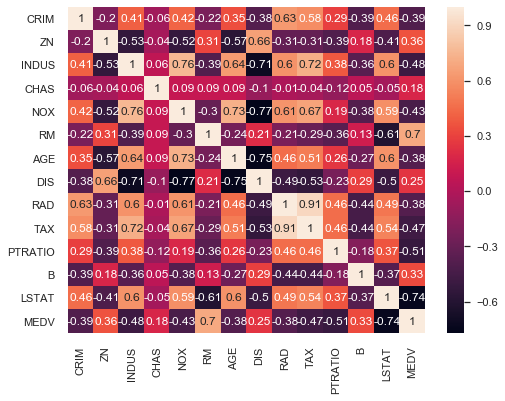

In [101]:
# Have a look at what is correlated with MEDV again
sns.set(rc={'figure.figsize':(8,6)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [102]:
# Let's look at the correlation matrix for MEDV
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

So to see what is the best number of parameters to use we will use the sledgehammer approach first. We will sort the parameters in order of the best correlation (positive or negative) and then check against increasing number of parameters to see which is the optimal.

In [103]:
# Sort the matrix in order of absolute correlation values 
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
# Remove the MEDV value itself
cm = cm.drop("MEDV",axis=0)
# Show us the result
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [104]:
# Putting all possible parameters in a list in order of absolute correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

### 4.1 Helper Functions <a name="help"></a>
As we are using the sledgehammer approach - we will write a number of functions to perform the tasks required.

In [105]:
y = data['MEDV'] # outputs

# This function gets the inputs - this will depend on the number of parameters we are using in the model
def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

There are a number of scaler functions available but we are just using one in this instance - StandardScaler.

In [106]:
# This function scales the inputs
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [107]:
# This function whitens the inputs
def whiten(noP, inputs):
    #  Whitening using Principal Component Analysis (PCA)
    pca = dec.PCA(n_components=noP, whiten=True)
    # Apply whitening to inputs
    pca.fit(inputs)
    # Return whitened dataframe
    return pd.DataFrame(pca.transform(inputs), columns=inputs.columns)

So what does scaling and whitening do? Let's have a look at a plot of the unscaled, scaled, whitened and scaled and whitened inputs.

In [108]:
# Unscaled (original) data
x = getInputs(13)
# Scaled data
x_scaled = pd.DataFrame(scaleDS(x), columns= params)
# Whitened data
x_whitened = pd.DataFrame(whiten(13,x), columns= params)
# Scaled and Whitened data
x_both =  pd.DataFrame(whiten(13,x_scaled), columns= params)

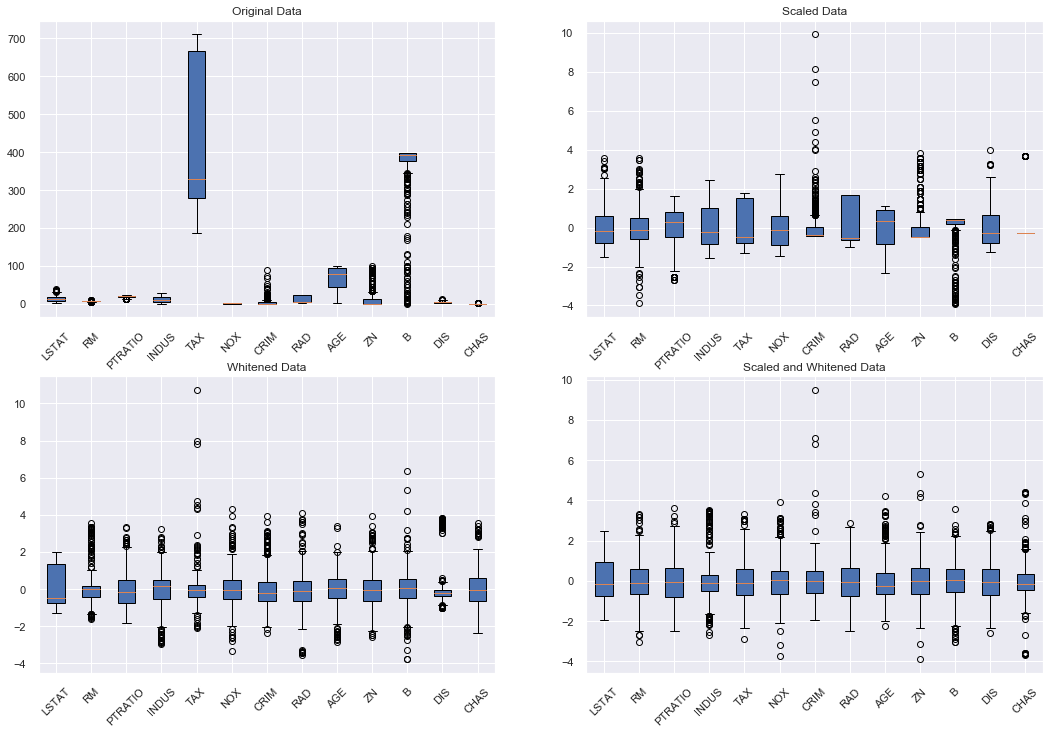

In [109]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [18, 12]

fig, axs = plt.subplots(2, 2)

# Original data
axs[0,0].boxplot(x.transpose(), patch_artist=True)
axs[0,0].set_title("Original Data")
axs[0,0].tick_params(axis='x', rotation=45)
axs[0,0].set_xticklabels(params)


# Scaled data
axs[0,1].boxplot(x_scaled.transpose(), patch_artist=True)
axs[0,1].set_title("Scaled Data")
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].set_xticklabels(params)


# Whitened data
axs[1,0].boxplot(x_whitened.transpose(), patch_artist=True)
axs[1,0].set_title("Whitened Data")
axs[1,0].tick_params(axis='x', rotation=45)
axs[1,0].set_xticklabels(params)


# Scaled and Whitened data
axs[1,1].boxplot(x_both.transpose(), patch_artist=True)
axs[1,1].set_title("Scaled and Whitened Data")
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].set_xticklabels(params)

plt.show()

There is a clear and obvious difference between the original data and all other plots. The original data is all in the native units and has a wide variety of ranges to each particular variable, as you would expect. These increased numerical values could put undue weight to the larger numbered variables for example we know from correlation matrix that the RM has a significant impact on the MEDV value, while the TAX attribute less so. The actual values of the TAX attribute are much bigger than that of RM so a change of 1 in the RM value could be lost amid a change of 100 in TAX, although the RM change has more actual impact. In order mitigate the influence of the larger numbered attributes scaling is applied.  

There are different types of scaling, eg MinMaxScaler, and StandardScaling. For the purposes of this study we are looking exclusively at the Scikit Learn's StandardScaler. This scalar standardises the attribute values by removing the mean and scaling to unit variance.  

The standard scaler result  of a sample x is calculated as:  

$$ z = \frac{x - \mu}{\sigma}$$

where $\mu$ is the mean of the data, and $\sigma$ is the standard deviation of the data.  

The difference between the scaled, whitened and scaled and whitened data is less obvious from the boxplot.  

The purpose of whitening is to adjust the data to reduce the influence of variable interdependence. In machine learning weights are adjusted to each variable on the assumption that each variable is independent. However, this is rarely the case. Looking at the correlation matrix for example we can see TAX and RAD are very highly correlated. By adding or taking away weight from one of these attributes, the other is alway affected. This can hamper machine learning. Whitening reduces the effects of this interdependence. Which is clear when we re-draw the correlation matrices.  

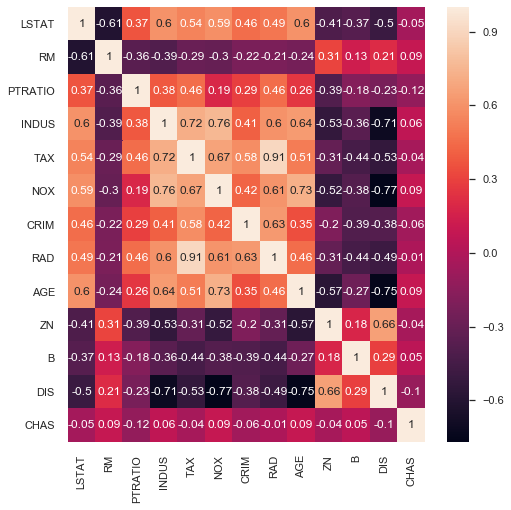

In [110]:
# Correlation heatmap of scaled data
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data=x_scaled.corr().round(2), annot=True)

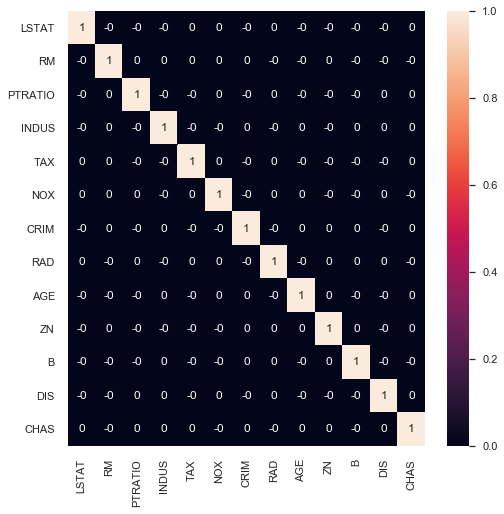

In [111]:
# Correlation heat map of whitened data
sns.heatmap(data=x_whitened.corr().round(2), annot=True)

We can see very clearly that the whitening of the data removes all correlations, making the attributes independent.  

Whitening post-scaling is applying both pre-processing techniques together which can have a augmented affect on the machine learning [[23](#23)].

Splitting the dataset into training and testing parts is recommended for checking your model. The split however can have an impact on how the model learns to predict the house prices. When we are comparing models it is good to take away this uncertainty so we are comparing against known differences between the models. To achieve this we use a parameter called seeded. If this is set to true the train / test split will be split using a repeatable seeded random state split which will divide the data repeatably.  

Conversely, if the seeded parameter is set to false there will be no seeding and there will be a random data split.

In [112]:
# This function splits the dataset into training and test data
# There is the option to apply a seed to the split too
def splitDS(inputs, seeded):
    # Make sure we are using the global paramters rather than creating local ones
    global x_train, x_test, y_train, y_test

    # Seed value used by the model random number generator
    seed = 7
    
    # if we are choosing to seed
    if seeded == True:
        # Split the dataset into training and testing with the random_state set
        x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize, random_state=seed)
    else:
        # Split the dataset into training and testing without the random_state being set
        x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [113]:
# This function creates the model with the specified activation type and optimiser
def createModel(actType, optType):
    
    # Making sure we are using the global parameters
    global noParams, noEpoch, batchSize
    
    # Create our model
    m = kr.models.Sequential()
    
    # Simple - no hidden layers
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    
    # Output layer - linear as it is a regression
    m.add(kr.layers.Dense(1, activation="linear"))
    
    # Defining our loss calculations
    m.compile(loss = "mean_squared_error", optimizer =optType)
    
    # Return the created model
    return m

In [114]:
# Use the model - specifying the model, the number of epochs, and the Batch Size
def doModel(model, epo, bs):
    # Ensuring we are using the global variables
    global x_train, x_test, y_tran, y_test, batchSize
    
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    
    # Evaluate the trained model using the test data
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

### <a name="test"></a>4.2 Performing the Tests
This is where we perform the tests. It takes a long time to execute so I have broken it out so each pre-processing regime is manually started as is each optimiser iteration. Every combination was executed x3 times for submission.  

This equates to:  

13 possible input parameters    x  
4  possible pre-processing types x  
7  possible activations  x   
3  possible optimisers  x   
3  times each

= 3275 neural networks tested.  

**Note:** This code only executes if the yesCreateModels variable is set to true. At upload, this variable is set to False and the data is loaded from the already created Excel file. To run the code - set yesCreateVariables to True and grab yourself a coffee!

In [119]:
# Parameterise everything

# Do you want to create and test all the models? 
# If yes, set the following to true, if no, leave at false and data from previous run will be read into dataframe
yesCreateModels = False

# No of variables to include in predictions - it is reset later
noParams = 4 

# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]

# model trial settings
# Optimisers
opts= ["sgd", "adam", "nadam"] # Comparing three different optimisers
opt = opts[2] # This is set manually to stop break up the execution time below
noEpoch= 100
batchSize = 10

# Whether the data should be scaled or not
# This is also set manually due
pre_process = "raw" # Pre-processing: raw, scaled, whitened, both 

# If you want to run it multiple times
noRuns = 1

if yesCreateModels == True:
    # Option to run the code multiple times
    for i in range(noRuns):
        results= []
        # Check for increasing no of attributes and all activations
        for act in acts: 
            for noParams in range(1,14):
                print("Run",i+1,"- Starting", act, "Parameter no:",noParams)
                # Create your inputs
                x = getInputs(noParams)
                # Split into training and testing data with seeding so they are wll working on same split
                splitDS(x, True)
                # Scale if it is called for
                if pre_process  == "scaled":
                    # Scale both the training and test datsets
                    x_train = scaleDS(x_train)
                    x_test = scaleDS(x_test)
                elif pre_process == "whitened":
                    x_train = whiten(noParams, x_train)
                    x_test = whiten(noParams, x_test)
                elif pre_process == "both":
                    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
                    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))

                # Create the model based on the parameters supplied
                m = createModel(act, opt)
                # Append the settings and final loss results after fitting and evaluating the model to the results file
                results.append([noParams, pre_process, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])
                
        if noRuns > 1:
            csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
            # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
            columns = ["no_attrib", "pre_process", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
            tempdf = pd.DataFrame(results, columns=columns)
            tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

In [120]:
# Transfer all the data to a an Excel file
if yesCreateModels == True and noRuns == 1:
    csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
    # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
    columns = ["no_attrib", "pre_process", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
    tempdf = pd.DataFrame(results, columns=columns)
    tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

In [148]:
# If you didn't want to do the generation, read the csv file already prepared anyway
df = pd.read_csv(r"data\results.csv", error_bad_lines=False)

So now we have all the data in. For submission I have run the code for all optimisers with all pre-processing available each for three times. If you have run the code with the yesCreateModels bit set to True, the results may be different to those being discussed here. If you want to revert to the data as submitted uncomment out the code below to reload the data as submitted.

In [149]:
# Uncomment out the line below if you want to revert to the results at time of submission
#df = pd.read_csv(r"data\seeded_results.csv", error_bad_lines=False)
# Uncomment out the line below if you want to look at the results without seeding
#df = pd.read_csv(r"data\unseeded_results.csv", error_bad_lines=False)
# Uncomment out the line below if you want to look at the results where all data was pre-processed before split
#df = pd.read_csv(r"data\ppTogether_results.csv", error_bad_lines=False)

### <a name="results"></a> 4.3 Looking at the Results
Obviously, with a brute force attack like the one we just performed, there will be a lot of scenarios tested that were particularly unsuited to the prediction of MEDV values. So before we start to weed these out, lets look at the numbers we are starting with.  

We will record all counts in a dataframe.

In [150]:
# The headers of our counts
preProcess = ["raw", "scaled", "whitened", "both"]
hdrs = ["Event"] + preProcess + acts + opts + list(range(1,13))

# Create a blank dataframe to house the counts at various junctions
dfCounts = pd.DataFrame(columns = hdrs)

# Check all is good so far
dfCounts

Empty DataFrame
Columns: [Event, raw, scaled, whitened, both, relu, tanh, sigmoid, exponential, elu, linear, softplus, sgd, adam, nadam, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []

[0 rows x 27 columns]

In [151]:
# We will use this function to record the counts for every row
def countRows(df, eventName):
    #row = []
    row = [eventName]
    # Loop through each pre-processing type and do a count
    for process in preProcess:
        # If there are values, count them
        if process in df.pre_process.values: 
            row.append(df[df.pre_process == process].pre_process.value_counts().item())
        # Otherwise put a 0 in the count
        else:
            row.append(0)
    # Loop through each of the actiivations and do a count
    for act in acts:
        # If is exists, count
        if act in df.activation.values: 
            row.append(df[df.activation == act].activation.value_counts().item())
        # Otherwise add a zero
        else:
            row.append(0)
    # Loop through each of the optimisers and do a count
    for opt in opts:
        # If the optimiser is present, count
        if opt in df.optimiser.values: 
            row.append(df[df.optimiser == opt].optimiser.value_counts().item())
        # If not, add a zero
        else:
            row.append(0)
    # For all the numbers of attributes
    for p in list(range(1,13)):
        # If it is present, count it
        if p in df.no_attrib.values: 
            row.append(df[df.no_attrib == p].no_attrib.value_counts().item())
        # Otherwise add a zero
        else:
            row.append(0)  
    # Put all the values in a dictionary with the headings [20]
    dictionary = dict(zip(hdrs, row))
    # Return the dictionary as a dataframe    
    return pd.DataFrame(dictionary, columns =hdrs, index =[0]) 

In [152]:
# So let's take a snapshot of counts at the start
dfCounts = dfCounts.append(countRows(df,"Start"),ignore_index=True)
dfCounts

Event  raw scaled whitened both relu tanh sigmoid exponential  elu  ...  \
0  Start  819    819      819  819  468  468     468         468  468  ...   

     3    4    5    6    7    8    9   10   11   12  
0  252  252  252  252  252  252  252  252  252  252  

[1 rows x 27 columns]

In [153]:
# Drop all rows that have no loss results
drop_rows = df.index[df["loss"].isnull()]
df.drop(drop_rows, axis=0, inplace=True)
dfCounts = dfCounts.append(countRows(df,"No NaNs"),ignore_index=True)
dfCounts

Event  raw scaled whitened both relu tanh sigmoid exponential  elu  ...  \
0    Start  819    819      819  819  468  468     468         468  468  ...   
1  No NaNs  654    781      783  781  461  468     468         259  451  ...   

     3    4    5    6    7    8    9   10   11   12  
0  252  252  252  252  252  252  252  252  252  252  
1  233  232  230  230  230  230  229  229  227  224  

[2 rows x 27 columns]

In [154]:
df.describe()

no_attrib     test_size  no_epochs  batch_size          loss
count  2999.000000  2.999000e+03     2999.0      2999.0  2.999000e+03
mean      6.934311  3.000000e-01      100.0        10.0  2.878665e+18
std       3.750742  1.504603e-14        0.0         0.0  1.194170e+20
min       1.000000  3.000000e-01      100.0        10.0  1.194930e+01
25%       4.000000  3.000000e-01      100.0        10.0  2.638611e+01
50%       7.000000  3.000000e-01      100.0        10.0  3.298013e+01
75%      10.000000  3.000000e-01      100.0        10.0  6.239932e+01
max      13.000000  3.000000e-01      100.0        10.0  5.976745e+21

As can be seen in the describe results above, there is a massive variation in loss results from around 12 to 6 x 10$^{21}$. These values are hugely skewed with 75% of all results below 62, yet the mean is 2.9 x 10$^{18}$! Lets remove that top 25%, and do so repeatedly until the loss is more reasonable - say under 25.

In [174]:
# Drop all rows that have loss over the 75 percentile [21] repeatedly until max loss value is under 15
while df.loss.max() > 25:
    drop_rows = df.index[df["loss"]>np.percentile(df.loss, 75, axis=0)]
    df.drop(drop_rows, axis=0, inplace=True)
    # See what this has done to the rows
    dfCounts = dfCounts.append(countRows(df,"Remove Values over 75%"),ignore_index=True)
# Look at the dataframe transposed to get a full look at the dataset
dfCounts.transpose()

0        1                       2                       3  \
Event        Start  No NaNs  Remove Values over 75%  Remove Values over 75%   
raw            819      654                     416                     264   
scaled         819      781                     778                     748   
whitened       819      783                     429                     301   
both           819      781                     626                     374   
relu           468      461                     349                     265   
tanh           468      468                     328                     225   
sigmoid        468      468                     352                     249   
exponential    468      259                     158                     135   
elu            468      451                     352                     291   
linear         468      428                     354                     238   
softplus       468      464                     356                     284   
sgd           1092      874                     558                     400   
adam          1092     1063                     841                     622   
nadam         1092     1062                     850                     665   
1              252      243                     216                     203   
2              252      236                     222                     203   
3              252      233                     220                     211   
4              252      232                     217                     148   
5              252      230                     201                     158   
6              252      230                     203                     156   
7              252      230                     186                     103   
8              252      230                     173                     112   
9              252      229                     139                      82   
10             252      229                     140                      80   
11             252      227                     116                      77   
12             252      224                     108                      78   

                                  4                       5  \
Event        Remove Values over 75%  Remove Values over 75%   
raw                             156                      90   
scaled                          647                     552   
whitened                        247                     198   
both                            215                     109   
relu                            230                     186   
tanh                            179                     145   
sigmoid                         174                     127   
exponential                     112                      91   
elu                             249                     196   
linear                           75                       6   
softplus                        246                     198   
sgd                             329                     279   
adam                            403                     272   
nadam                           533                     398   
1                               168                     126   
2                               145                      80   
3                               165                     133   
4                                97                      68   
5                               105                      86   
6                               111                      92   
7                                60                      40   
8                                88                      57   
9                                60                      48   
10                               61                      47   
11                               71                      56   
12                               69                      58   

                                  6    

Well that has gotten rid of most of the data! There are suddenly only 10 raw values at all and no values with a linear activation!  

So what does that leave us with? Let's plot them out.

Text(0.5, 1.0, 'Performance of Different Activations Using Various Number of Attributes')

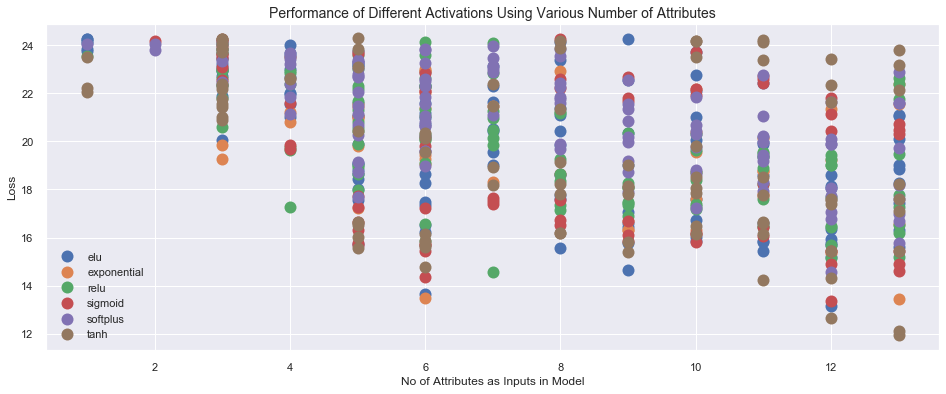

In [156]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]

# Group the data by activation
groups = df.groupby(["activation"])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# For each activation group, plot the loss vs no of attributes used
for activation, group in groups:
    ax.plot(group["no_attrib"], group["loss"], "o", ms=12, label=activation)
    
# Add the legend
ax.legend()
# And labels and titles
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
plt.title("Performance of Different Activations Using Various Number of Attributes", fontsize = 14)

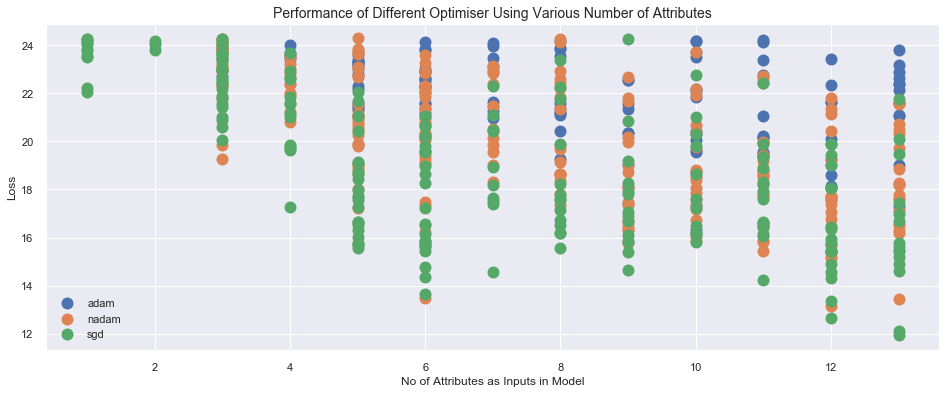

In [157]:
# A quick check to see there was more than one optimiser used. 
# This would not be the case if the user didn not append to existing results fil
if len(df.optimiser.unique()) >1:
    # Plot the actvations to see which performed best
    plt.rcParams["figure.figsize"] = [16, 6]
    # Group the data by the optimiser
    groups = df.groupby('optimiser')

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for optimiser, group in groups:
        # For each optimiser  plot the no of attobutes used in the model against the loss
        ax.plot(group["no_attrib"], group["loss"], "o", ms=12, label=optimiser)
    
    # Add legend, labels and title
    ax.legend()
    ax.set_ylabel("Loss")
    ax.set_xlabel("No of Attributes as Inputs in Model")
    plt.title("Performance of Different Optimiser Using Various Number of Attributes", fontsize = 14)
else:
    # Otherwise print a message
    print("Only one optimiser used")

That doesn't tell us much.Lets try some boxplots instead.

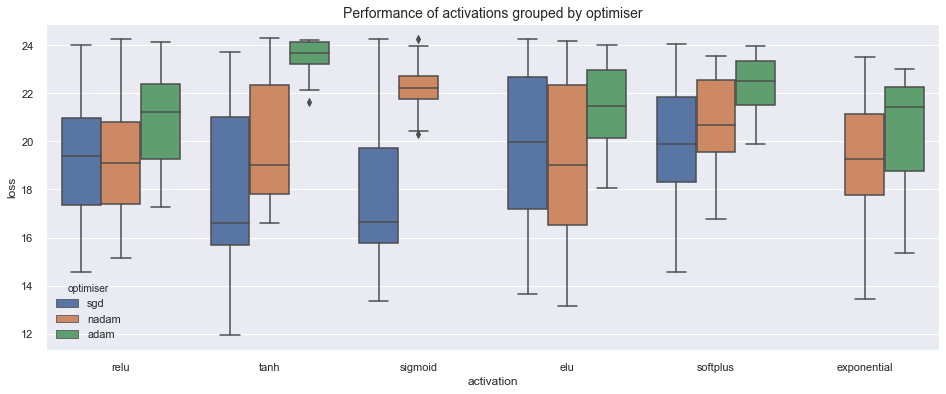

In [158]:
# Plot of activations against loss grouped by optimiser
# First need to check if there is more than one optimiser in the dataset
if len(df.optimiser.unique())>1:
    # Do the boplot
    sns.boxplot(x = "activation", y = "loss", hue = "optimiser", data = df)
    # And title
    plt.title("Performance of activations grouped by optimiser", fontsize = 14)
# Otherwise just print a message
else:
    print("Only one optimiser used")

In this plot we can see that the sigmoid gradient descent optimiser had the best overall performance, follwed by nadam and finally adam.  

From an activation, the tanh activation proved to be the best but with close competition.

Text(0.5, 1.0, 'Performance of Activations Grouped by Pre-Processing Technique')

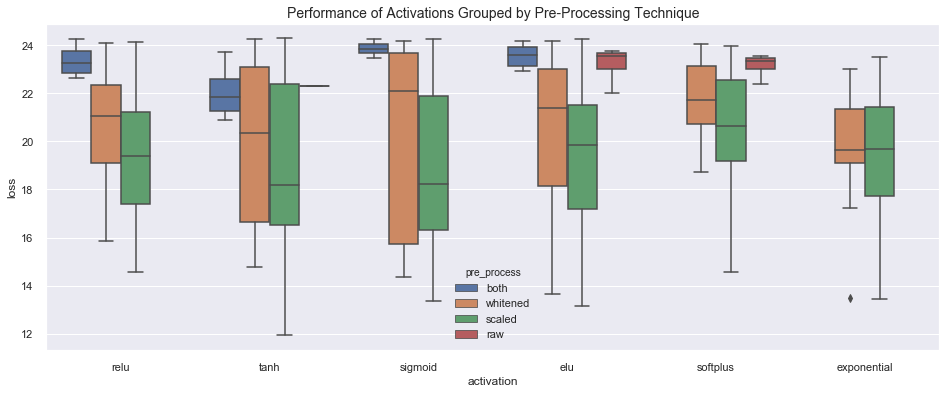

In [159]:
# Boxplot of Activations grouped by Pre-Processing technique
sns.boxplot(x = "activation", y = "loss", hue = "pre_process", data = df)
plt.title("Performance of Activations Grouped by Pre-Processing Technique",fontsize = 14)

Looking at the pre-processing techniques on the activations, somewhat surprisingly the scaled non-whitened data appeared to produce the best result overall. The data that went through two lots of pre-processing, scaling and whitening didn't win out in any category and even lost out to raw data with the softplus activations. Both sigmoid and tanh activations proved to be the best but only marginally.

Text(0.5, 1.0, 'Performance of No of Attributes Grouped by Optimiser')

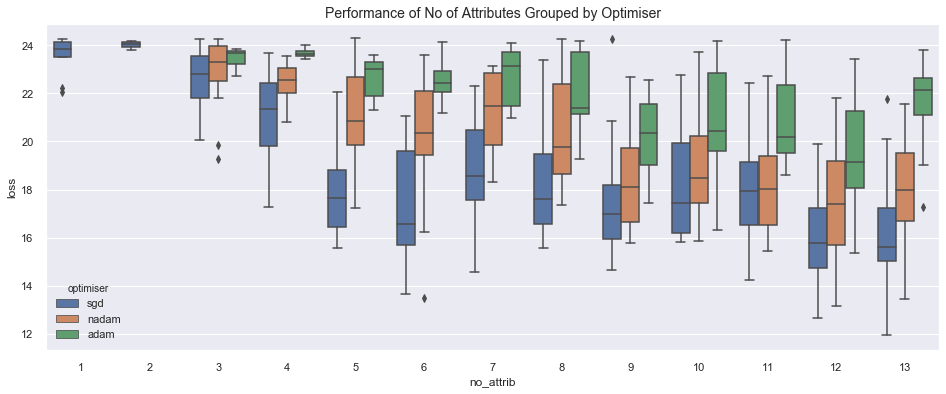

In [160]:
# Boxplot of Opt
sns.boxplot(x = "no_attrib", y = "loss", hue = "optimiser", data = df)
plt.title("Performance of No of Attributes Grouped by Optimiser",fontsize = 14)

Here we can see the sgd optimiser the clear winner, producing the most results over the greatest range of attribute values. This was followed by nadam and finally adam.

Text(0.5, 1.0, 'Performance of No of Attributes Grouped by Activations')

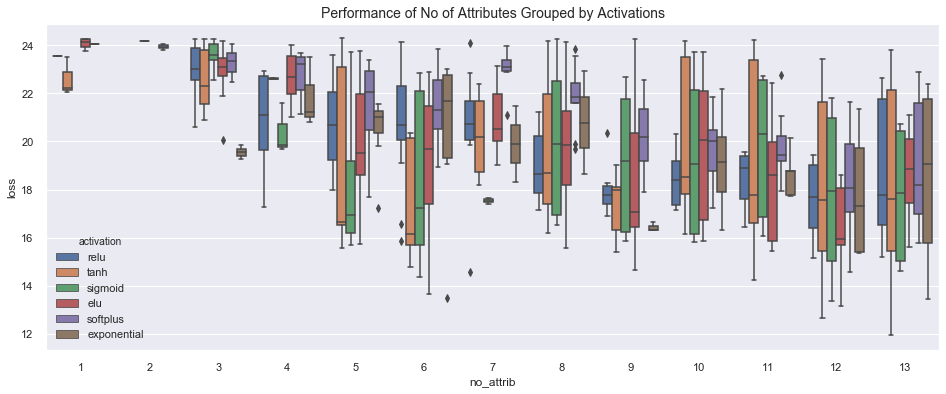

In [161]:
# Comparing the Activations with number of attributes
sns.boxplot(x = "no_attrib", y = "loss", hue = "activation", data = df)
plt.title("Performance of No of Attributes Grouped by Activations",fontsize = 14)

There is interesting variation in the activations. The tanh and sigmoid activations appear to be the most consistent throughout.

### 4.4 Top Performers <a name="top"></a>
Let's look at the top five best loss results  - individually and as an average of all their three readings.

In [162]:
# The top 5 individual model iterations according to loss
df.sort_values(by='loss', ascending=True).head(5)

no_attrib pre_process  test_size activation optimiser  no_epochs  \
1754         13      scaled        0.3       tanh       sgd        100   
1845         13      scaled        0.3       tanh       sgd        100   
1844         12      scaled        0.3       tanh       sgd        100   
2429         12      scaled        0.3        elu     nadam        100   
1857         12      scaled        0.3    sigmoid       sgd        100   

      batch_size       loss  
1754          10  11.949305  
1845          10  12.124926  
1844          10  12.641054  
2429          10  13.169336  
1857          10  13.367053

In [163]:
# The top 5 based on averages
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]].groupby(["no_attrib", "pre_process", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True).head(5)

loss
no_attrib pre_process activation optimiser           
13        scaled      tanh       sgd        13.177090
12        scaled      tanh       sgd        14.137263
                      sigmoid    sgd        14.555456
                      elu        nadam      14.677992
13        scaled      sigmoid    sgd        14.993482

Looking at the top performers - all both individual and averages are from scaled data. All bar one have sgd optimiser employed.

#### 4.4.1 Top 5 Scaled and Whitened Models

In [164]:
# The top 5 individual model iterations according to loss
df[df.pre_process == "both"].sort_values(by='loss', ascending=True).head(5)

no_attrib pre_process  test_size activation optimiser  no_epochs  \
15           3        both        0.3       tanh       sgd        100   
106          3        both        0.3       tanh       sgd        100   
195          1        both        0.3       tanh       sgd        100   
184          3        both        0.3       relu       sgd        100   
691          3        both        0.3        elu     nadam        100   

     batch_size       loss  
15           10  20.895384  
106          10  21.412517  
195          10  22.240276  
184          10  22.622894  
691          10  22.935658

In [165]:
# The top 5 based on averages
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]][df.pre_process == "both"].groupby(["no_attrib", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True).head(5)

loss
no_attrib activation optimiser           
3         tanh       sgd        22.009808
1         tanh       sgd        22.240276
3         relu       sgd        22.622894
4         relu       sgd        22.940846
3         elu        sgd        22.984446

The top performers from data that has undergone two lots of pre-processing all are related to a much lower number of attributes, than the scaled version. Again, all bar one using the sgd optimiser and tanh is the best perforning activation.

#### 4.4.2 Top 5 Whitened Models

In [166]:
# The top 5 individual model iterations according to loss
df[df.pre_process == "whitened"].sort_values(by='loss', ascending=True).head(5)

no_attrib pre_process  test_size   activation optimiser  no_epochs  \
1591          6    whitened        0.3  exponential     nadam        100   
967           6    whitened        0.3          elu       sgd        100   
1032          6    whitened        0.3      sigmoid       sgd        100   
837           6    whitened        0.3         tanh       sgd        100   
850           6    whitened        0.3      sigmoid       sgd        100   

      batch_size       loss  
1591          10  13.475684  
967           10  13.670392  
1032          10  14.349659  
837           10  14.788299  
850           10  15.423758

In [167]:
# The top 5 based on averages
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]][df.pre_process == "whitened"].groupby(["no_attrib", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True).head(5)

loss
no_attrib activation optimiser           
6         elu        sgd        15.096990
          sigmoid    sgd        15.149427
5         sigmoid    sgd        15.924376
          tanh       sgd        16.074391
6         tanh       sgd        16.653592

The whitened top performers are like a half way house in the number of attributes - halfway between the scaled and the scaled and whitened results. The best performer here was a nadam optimised model and there were a lot more variety in the activations.

#### 4.4.3 Top 5 Scaled Models

In [168]:
# The top 5 individual model iterations according to loss
df[df.pre_process == "scaled"].sort_values(by='loss', ascending=True).head(5)

no_attrib pre_process  test_size activation optimiser  no_epochs  \
1754         13      scaled        0.3       tanh       sgd        100   
1845         13      scaled        0.3       tanh       sgd        100   
1844         12      scaled        0.3       tanh       sgd        100   
2429         12      scaled        0.3        elu     nadam        100   
1857         12      scaled        0.3    sigmoid       sgd        100   

      batch_size       loss  
1754          10  11.949305  
1845          10  12.124926  
1844          10  12.641054  
2429          10  13.169336  
1857          10  13.367053

In [169]:
# The top 5 based on averages
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]][df.pre_process == "scaled"].groupby(["no_attrib", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True).head(5)

loss
no_attrib activation optimiser           
13        tanh       sgd        13.177090
12        tanh       sgd        14.137263
          sigmoid    sgd        14.555456
          elu        nadam      14.677992
13        sigmoid    sgd        14.993482

The scaled models are the same as the overall results.

#### 4.4.4 Top 5 Raw Models

In [171]:
# The top 5 individual model iterations according to loss
df[df.pre_process == "raw"].sort_values(by='loss', ascending=True).head(5)

no_attrib pre_process  test_size activation optimiser  no_epochs  \
3149          4         raw        0.3        elu     nadam        100   
3109          3         raw        0.3       tanh     nadam        100   
3175          4         raw        0.3   softplus     nadam        100   
3240          4         raw        0.3        elu     nadam        100   
3084          4         raw        0.3   softplus     nadam        100   

      batch_size       loss  
3149          10  22.019313  
3109          10  22.304670  
3175          10  22.404124  
3240          10  22.995800  
3084          10  23.199939

In [173]:
# The top 5 based on averages
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]][df.pre_process == "raw"].groupby(["no_attrib", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True).head(5)

loss
no_attrib activation optimiser           
3         tanh       nadam      22.304670
4         elu        nadam      22.507557
          softplus   nadam      23.048979
                     adam       23.445227
          elu        adam       23.630539

The raw models performed best under a smaller amount of attributes like the scaled and whitened. Unlike the other pre-processing techniques, the best performing optimiser was the nadam. 

The above data was generated using a sledgehammer approach of getting the computer to go through lots of permutations and combinations with no variations in the layers, epochs _etc._. Each of these models could be further optimised harnessing the knowledge we have gained here. 

### <a name="model"></a>4.5 Using the Results
For each of the pre-processing techniques we will look a small bit further on their performance, adding an additional layer based on their best performing activations.  

We will also include early stopping which will stop the neural network from continuing where no improvment is spotted. It is hoped that by doing this we will avoid over fitting.  

Over fitting is where the neural network is overtrained on the training data and almost learns the answers. This will result in great loss results in the training, but when confronted with data it has not seen before _i.e._ in the test data, it performs poorly. [[27](#27)]  

Underfitting is when the neural network has not yet learned to predict the trends of the data. The diagram below shows examples of over, under and correct fitting.
<img src="images/overfitting.png"/>

We will need one eper function again. This time to plot the differences between the actual and predicted MEDV values.

In [182]:
# This is a function to plot the variances between the predicted and the actual values
def vPlot(pred, predt):
    var1=[]
    var2=[]
    i = 0
    # Loop through each value in the test
    for val in y_test:
        # Some exception handling as ran into errors at the beginning - just continue 
        try:
            #  Subtract the predicted value away from the actual value. 
            var1.append(val - pred[i])
        except:
            # Continue on error
            pass
        i+=1
    i = 0
    # Do the same for the taining data
    for val in y_train:
        try:
            var2.append(val - predt[i])
        except:
            pass
        i+=1
    # PLot the two variances
    plt.plot(var1, "g-", label = "Test Variance")
    plt.plot(var2, "b-", label = "Train Variance")
    plt.title("Variance Between Actual and Predicted MEDV Values")
    plt.legend()

#### 4.5.1 Scaled Data
Let's start at the best performing of our models - those employing scaled data using sgd optimiser, tanh and sigmoid activations and 13,12 inputs.  

We have also included a hidden layer in the neural network. 

In [319]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Scaled Model 1
noParams = 13
pre_process = "scaled"
act = "tanh"
opt = "sgd"

# Create our model
sm1 = models.Sequential()
    
# Increasing units and adding a hidden layer
sm1.add(layers.Dense(50, input_dim=noParams, activation = act))
sm1.add(layers.Dense(25, activation = act))
# Output layer - linear as it is a regression
sm1.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
sm1.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
shistory1 = sm1.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 0s 1ms/step - loss: 22.1917 - mse: 574.2174 - val_loss: 20.7002 - val_mse: 493.0361
Epoch 2/200
247/247 [==============================] - 0s 214us/step - loss: 21.1124 - mse: 523.3137 - val_loss: 19.5709 - val_mse: 444.0834
Epoch 3/200
247/247 [==============================] - 0s 182us/step - loss: 19.5663 - mse: 455.8459 - val_loss: 17.7832 - val_mse: 375.9200
Epoch 4/200
247/247 [==============================] - 0s 178us/step - loss: 17.1697 - mse: 365.4550 - val_loss: 14.9031 - val_mse: 283.0952
Epoch 5/200
247/247 [==============================] - 0s 190us/step - loss: 13.6738 - mse: 258.5465 - val_loss: 11.0080 - val_mse: 182.1760
Epoch 6/200
247/247 [==============================] - 0s 190us/step - loss: 9.6618 - mse: 156.1614 - val_loss: 7.1906 - val_mse: 100.5678
Epoch 7/200
247/247 [==============================] - 0s 157us/step - loss: 6.5168 - mse: 92.4774 - val_loss: 4

Having tried using 12 and 13 parameters, 12 was the best performing. The sigmoid activation function produced poorer results.  

In [320]:
sm1.evaluate(x_test,y_test)

152/152 [==============================] - 0s 39us/step


[5.118895304830451, 67.14656829833984]

Scaled Model 1 (All Data): Test score = 8.19 (Training score = 6.66 )


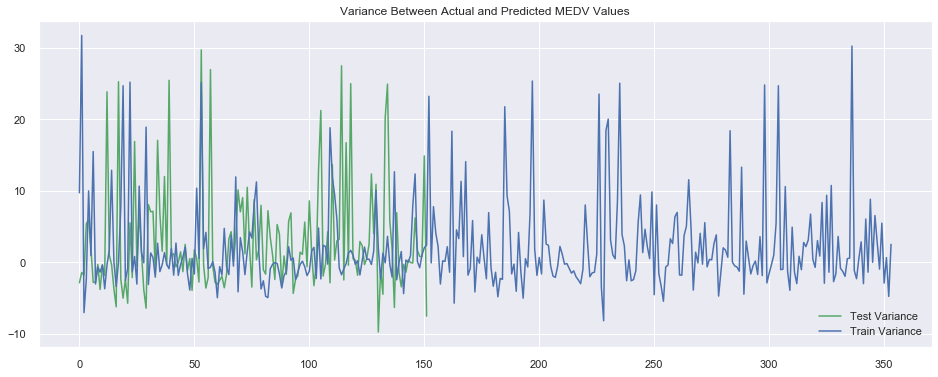

In [321]:
# Predict and relay the scores
spred1 = sm1.predict(x_test)
spredt1 = sm1.predict(x_train)
sscore1 = np.sqrt(metrics.mean_squared_error(spred1, y_test))
sscoret1 = np.sqrt(metrics.mean_squared_error(spredt1, y_train))
print("Scaled Model 1 (All Data): Test score =", np.round(sscore1,2), "(Training score =",np.round(sscoret1,2),")")
vPlot(spred1,spredt1)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


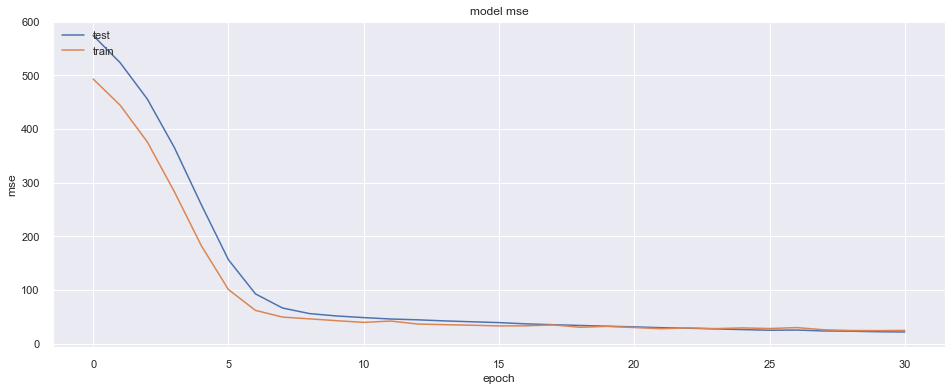

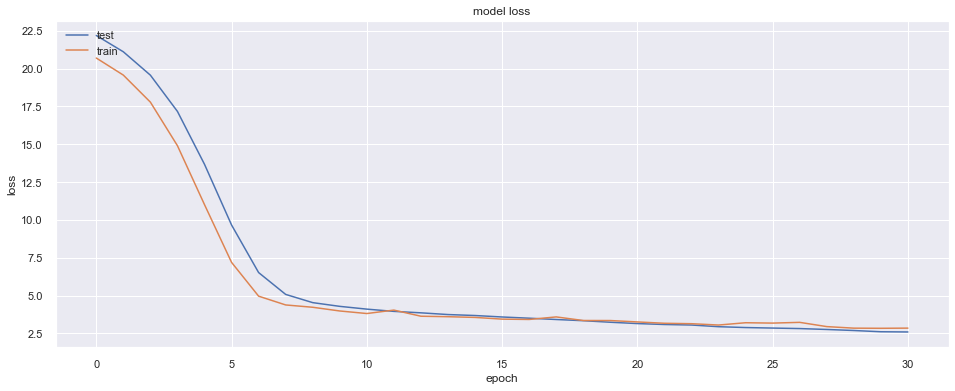

In [322]:
# list all data in history
print(shistory1.history.keys())
# summarize history for mean squared error
plt.plot(shistory1.history['mse'])
plt.plot(shistory1.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(shistory1.history['loss'])
plt.plot(shistory1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

#### 4.5.2 Scaled and Whitened Data
Now look at those employing scaled and whitened data using sgd optimiser, tanh and relu activations and 1 or 3 inputs.  

We have also included a hidden layer in the neural network. 

In [323]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Both Model 1
noParams = 3
pre_process = "both"
act = "tanh"
opt = "sgd"

# Create our model
bm1 = models.Sequential()
    
# Increasing units and adding a hidden layer
bm1.add(layers.Dense(50, input_dim=noParams, activation = act))
bm1.add(layers.Dense(25, activation = act))
# Output layer - linear as it is a regression
bm1.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
bm1.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
bhistory1 = bm1.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 0s 1ms/step - loss: 22.0946 - mse: 576.5679 - val_loss: 21.2704 - val_mse: 538.5499
Epoch 2/200
247/247 [==============================] - 0s 161us/step - loss: 20.4732 - mse: 507.5293 - val_loss: 19.2456 - val_mse: 456.6046
Epoch 3/200
247/247 [==============================] - 0s 190us/step - loss: 17.8700 - mse: 406.6079 - val_loss: 15.9616 - val_mse: 339.8961
Epoch 4/200
247/247 [==============================] - 0s 157us/step - loss: 14.0296 - mse: 283.4804 - val_loss: 11.7370 - val_mse: 216.9593
Epoch 5/200
247/247 [==============================] - 0s 194us/step - loss: 9.9520 - mse: 175.4366 - val_loss: 8.3206 - val_mse: 131.5916
Epoch 6/200
247/247 [==============================] - 0s 182us/step - loss: 7.1947 - mse: 114.0206 - val_loss: 6.2758 - val_mse: 91.8562
Epoch 7/200
247/247 [==============================] - 0s 170us/step - loss: 5.8426 - mse: 84.3892 - val_loss: 5.46

Having tried using 1 and 3 parameters, 3 was the best performing. The relu activation function achieved slightly  poorer results. See below.  

In [324]:
bm1.evaluate(x_test,y_test)

152/152 [==============================] - 0s 33us/step


[9.82974981006823, 172.44219970703125]

Scaled and Whitened Model 1 (All Data): Test score = 13.13 (Training score = 6.92 )


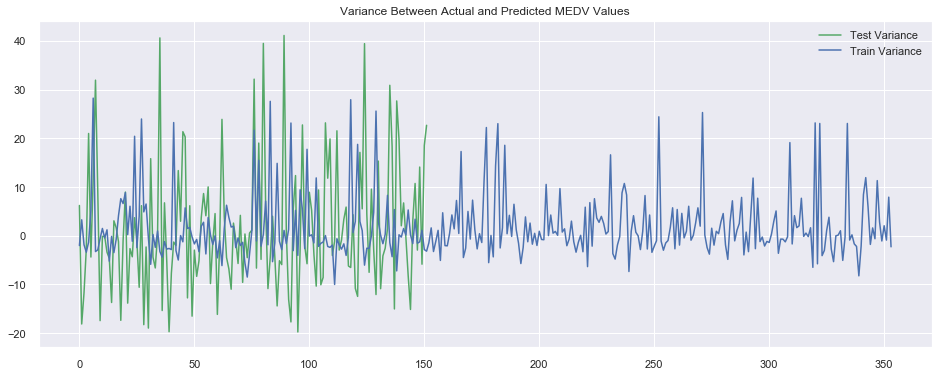

In [325]:
# Predict and relay the scores
bpred1 = bm1.predict(x_test)
bpredt1 = bm1.predict(x_train)
bscore1 = np.sqrt(metrics.mean_squared_error(bpred1, y_test))
bscoret1 = np.sqrt(metrics.mean_squared_error(bpredt1, y_train))
print("Scaled and Whitened Model 1 (All Data): Test score =", np.round(bscore1,2), "(Training score =",np.round(bscoret1,2),")")
vPlot(bpred1,bpredt1)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


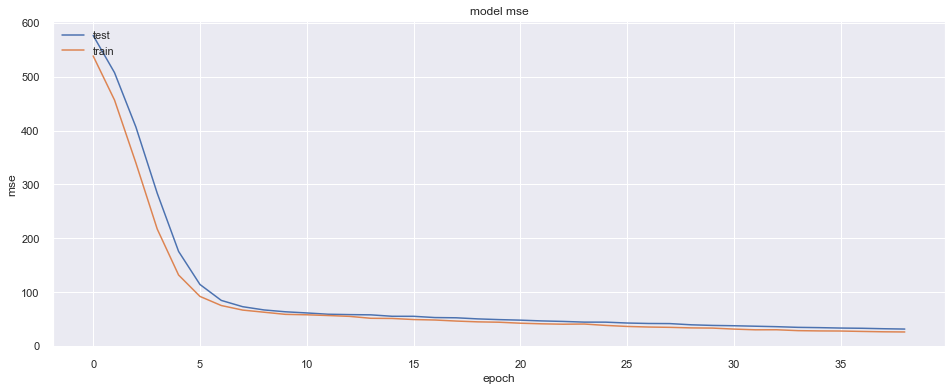

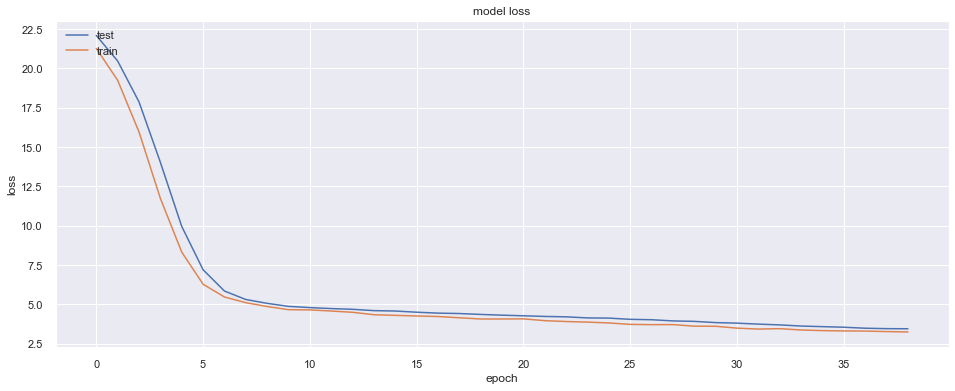

In [326]:
# list all data in history
print(bhistory1.history.keys())
# summarize history for mean squared error
plt.plot(bhistory1.history['mse'])
plt.plot(bhistory1.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(bhistory1.history['loss'])
plt.plot(bhistory1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

The combo of tanh and relu activations was an interesting one too. 

In [368]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Both Model 2
noParams = 13
pre_process = "both"
act = "tanh"
opt = "sgd"

# Create our model
bm2 = models.Sequential()
    
# Increasing units and adding a hidden layer
bm2.add(layers.Dense(50, input_dim=noParams, activation = act))
bm2.add(layers.Dense(25, activation = "relu"))
# Output layer - linear as it is a regression
bm2.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
bm2.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
bhistory2 = bm2.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 0s 1ms/step - loss: 22.1400 - mse: 575.9931 - val_loss: 20.6716 - val_mse: 506.7987
Epoch 2/200
247/247 [==============================] - 0s 192us/step - loss: 20.9743 - mse: 525.4605 - val_loss: 19.2886 - val_mse: 450.2303
Epoch 3/200
247/247 [==============================] - 0s 157us/step - loss: 19.1413 - mse: 450.6151 - val_loss: 16.8747 - val_mse: 360.7137
Epoch 4/200
247/247 [==============================] - 0s 162us/step - loss: 15.4204 - mse: 321.5624 - val_loss: 11.3215 - val_mse: 199.7130
Epoch 5/200
247/247 [==============================] - 0s 178us/step - loss: 7.7612 - mse: 129.8264 - val_loss: 4.9393 - val_mse: 61.4029
Epoch 6/200
247/247 [==============================] - 0s 162us/step - loss: 4.0077 - mse: 43.8000 - val_loss: 3.5071 - val_mse: 27.9654
Epoch 7/200
247/247 [==============================] - 0s 186us/step - loss: 3.2842 - mse: 28.5246 - val_loss: 3.5110

Having tried using 12 and 13 parameters, 12 was the best performing. The sigmoid activation function produced poorer results.  

In [369]:
bm2.evaluate(x_test,y_test)

152/152 [==============================] - 0s 39us/step


[5.018268560108385, 50.255496978759766]

Scaled and Whitened Model 1 (All Data): Test score = 10.22 (Training score = 10.2 )


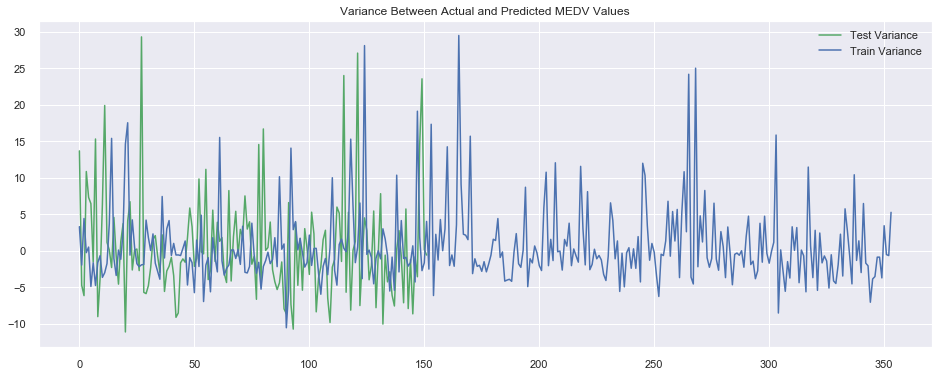

In [370]:
# Predict and relay the scores
bpred2 = bm2.predict(x_test)
bpredt2 = bm2.predict(x_train)
bscore2 = np.sqrt(metrics.mean_squared_error(spred1, y_test))
bscoret2 = np.sqrt(metrics.mean_squared_error(spredt1, y_train))
print("Scaled and Whitened Model 1 (All Data): Test score =", np.round(bscore2,2), "(Training score =",np.round(bscoret2,2),")")
vPlot(bpred2,bpredt2)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


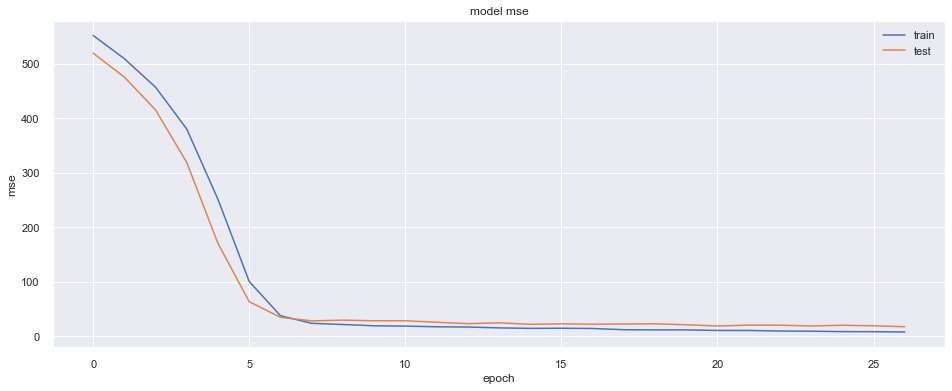

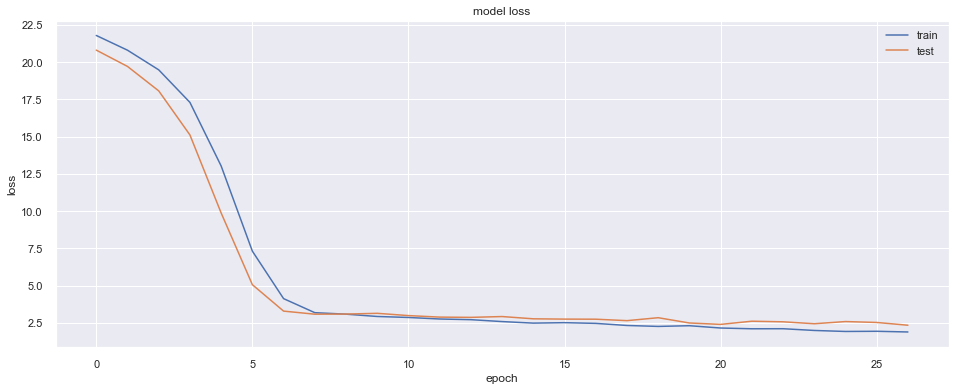

In [330]:
# list all data in history
print(shistory1.history.keys())
# summarize history for mean squared error
plt.plot(bhistory2.history['mse'], label = "train")
plt.plot(bhistory2.history['val_mse'], label = "test")
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()
# summarize history for loss
plt.plot(bhistory2.history['loss'], label = "train")
plt.plot(bhistory2.history['val_loss'], label = "test")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

#### 4.5.3 Whitened Data
Now look at those employing whitened data using sgd and nadam optimisers, exp, elu and sigmoid activations and 6 inputs.  

We have also included a hidden layer in the neural network. 

In [331]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Whitened Model 1
noParams = 6
pre_process = "whitened"
act1 = "exponential"
act2 = "elu"
opt = "nadam"

# Create our model
wm1 = models.Sequential()
    
# Increasing units and adding a hidden layer
wm1.add(layers.Dense(50, input_dim=noParams, activation = act1))
wm1.add(layers.Dense(25, activation = act2))
# Output layer - linear as it is a regression
wm1.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
wm1.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
whistory1 = wm1.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 1s 3ms/step - loss: 18.0943 - mse: 418.0803 - val_loss: 12.6850 - val_mse: 250.1713
Epoch 2/200
247/247 [==============================] - 0s 214us/step - loss: 7.7578 - mse: 106.2458 - val_loss: 5.9619 - val_mse: 73.7209
Epoch 3/200
247/247 [==============================] - 0s 176us/step - loss: 4.8505 - mse: 47.8493 - val_loss: 4.6715 - val_mse: 51.3293
Epoch 4/200
247/247 [==============================] - 0s 186us/step - loss: 3.9385 - mse: 33.2767 - val_loss: 3.6772 - val_mse: 35.2724
Epoch 5/200
247/247 [==============================] - 0s 214us/step - loss: 3.3209 - mse: 23.9931 - val_loss: 3.1800 - val_mse: 27.9735
Epoch 6/200
247/247 [==============================] - 0s 206us/step - loss: 3.0187 - mse: 21.8632 - val_loss: 3.0641 - val_mse: 24.7534
Epoch 7/200
247/247 [==============================] - 0s 194us/step - loss: 2.7717 - mse: 18.6497 - val_loss: 3.3318 - val_mse: 

Having tried using 1 and 3 parameters, 3 was the best performing. The relu activation function achieved slightly  poorer results. See below.  

In [332]:
wm1.evaluate(x_test,y_test)

152/152 [==============================] - 0s 52us/step


[4.609789898521022, 39.622467041015625]

Scaled and Whitened Model 1 (All Data): Test score = 6.29 (Training score = 4.88 )


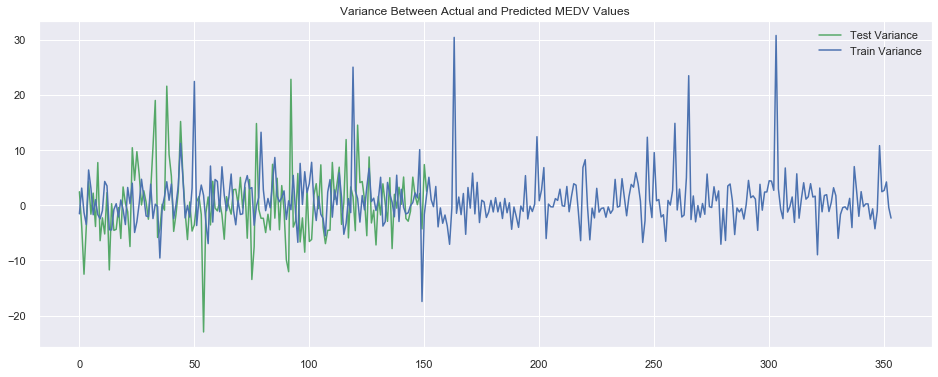

In [333]:
# Predict and relay the scores
wpred1 = wm1.predict(x_test)
wpredt1 = wm1.predict(x_train)
wscore1 = np.sqrt(metrics.mean_squared_error(wpred1, y_test))
wscoret1 = np.sqrt(metrics.mean_squared_error(wpredt1, y_train))
print("Whitened Model 1 (All Data): Test score =", np.round(wscore1,2), "(Training score =",np.round(wscoret1,2),")")
vPlot(wpred1,wpredt1)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


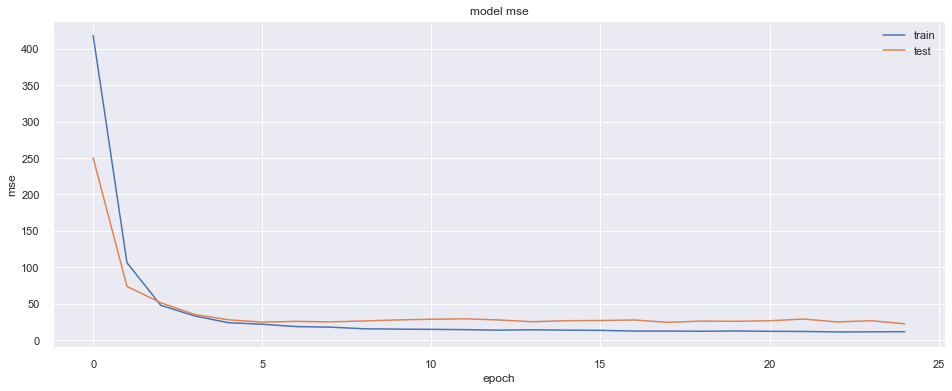

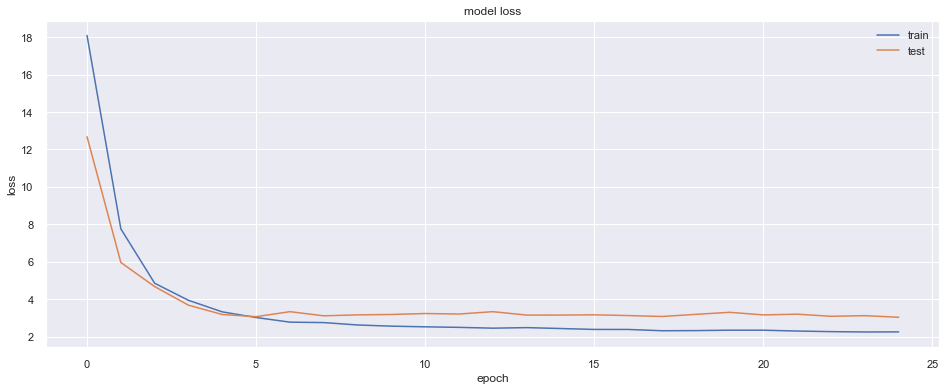

In [334]:
# list all data in history
print(whistory1.history.keys())
# summarize history for mean squared error
plt.plot(whistory1.history["mse"], label = "train")
plt.plot(whistory1.history["val_mse"], label = "test")
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()
# summarize history for loss
plt.plot(whistory1.history["loss"], label = "train")
plt.plot(whistory1.history["val_loss"], label = "test")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

In [335]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Whitened Model 2
noParams = 6
pre_process = "whitened"
act1 = "exponential"
act2 = "elu"
opt = "sgd"

# Create our model
wm2 = models.Sequential()
    
# Increasing units and adding a hidden layer
wm2.add(layers.Dense(50, input_dim=noParams, activation = act1))
wm2.add(layers.Dense(25, activation = act2))
# Output layer - linear as it is a regression
wm2.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
wm2.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
whistory2 = wm2.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 0s 2ms/step - loss: 9.1443 - mse: 169.7466 - val_loss: 5.5095 - val_mse: 54.2133
Epoch 2/200
247/247 [==============================] - 0s 170us/step - loss: 3.7062 - mse: 27.4897 - val_loss: 3.8702 - val_mse: 31.2200
Epoch 3/200
247/247 [==============================] - 0s 218us/step - loss: 2.9762 - mse: 17.5988 - val_loss: 3.7921 - val_mse: 32.9644
Epoch 4/200
247/247 [==============================] - 0s 202us/step - loss: 2.8532 - mse: 16.2821 - val_loss: 3.7688 - val_mse: 31.4612
Epoch 5/200
247/247 [==============================] - 0s 174us/step - loss: 2.8876 - mse: 16.5706 - val_loss: 3.7884 - val_mse: 33.4532
Epoch 6/200
247/247 [==============================] - 0s 202us/step - loss: 2.7308 - mse: 15.8895 - val_loss: 3.6842 - val_mse: 30.4941
Epoch 7/200
247/247 [==============================] - 0s 194us/step - loss: 2.7133 - mse: 15.4991 - val_loss: 3.4884 - val_mse: 29.0

Having tried using 1 and 3 parameters, 3 was the best performing. The relu activation function achieved slightly  poorer results. See below.  

In [336]:
wm2.evaluate(x_test,y_test)

152/152 [==============================] - 0s 59us/step


[4.911303068462171, 45.688690185546875]

Scaled and Whitened Model 1 (All Data): Test score = 6.76 (Training score = 4.68 )


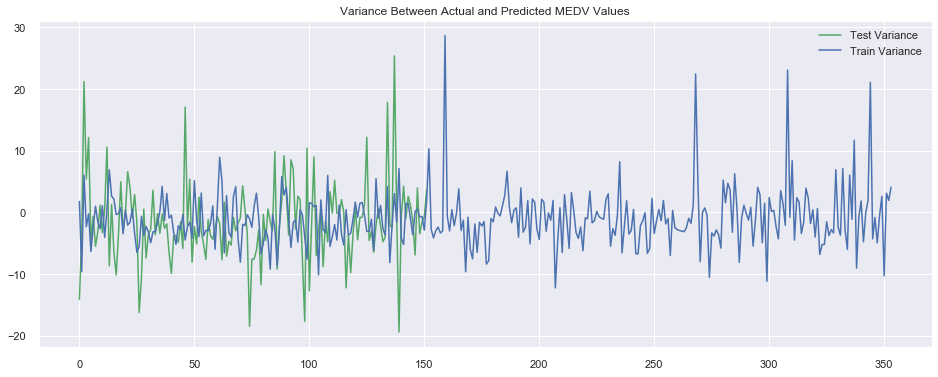

In [337]:
# Predict and relay the scores
wpred2 = wm2.predict(x_test)
wpredt2 = wm2.predict(x_train)
wscore2 = np.sqrt(metrics.mean_squared_error(wpred2, y_test))
wscoret2 = np.sqrt(metrics.mean_squared_error(wpredt2, y_train))
print("Whitened Model 2 (All Data): Test score =", np.round(wscore2,2), "(Training score =",np.round(wscoret2,2),")")
vPlot(wpred2,wpredt2)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


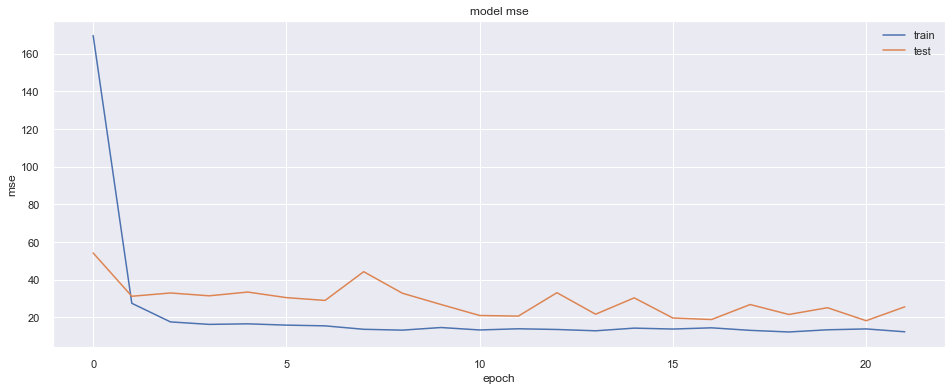

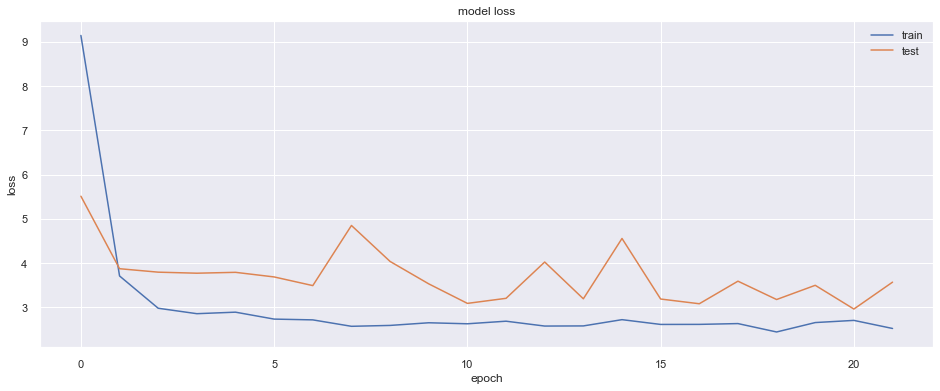

In [338]:
# list all data in history
print(whistory2.history.keys())
# summarize history for mean squared error
plt.plot(whistory2.history["mse"], label = "train")
plt.plot(whistory2.history["val_mse"], label = "test")
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()
# summarize history for loss
plt.plot(whistory2.history["loss"], label = "train")
plt.plot(whistory2.history["val_loss"], label = "test")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

In [365]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Whitened Model 3
noParams = 6
pre_process = "whitened"
act1 = "exponential"
act2 = "sigmoid"
opt = "nadam"

# Create our model
wm3 = models.Sequential()
    
# Increasing units and adding a hidden layer
wm3.add(layers.Dense(50, input_dim=noParams, activation = act1))
wm3.add(layers.Dense(25, activation = act2))
# Output layer - linear as it is a regression
wm3.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
wm3.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
whistory3 = wm3.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 1s 3ms/step - loss: 22.1419 - mse: 581.1033 - val_loss: 18.8389 - val_mse: 429.0591
Epoch 2/200
247/247 [==============================] - 0s 188us/step - loss: 20.1999 - mse: 501.1369 - val_loss: 17.7451 - val_mse: 389.4266
Epoch 3/200
247/247 [==============================] - 0s 190us/step - loss: 19.3600 - mse: 468.5857 - val_loss: 17.0516 - val_mse: 365.4436
Epoch 4/200
247/247 [==============================] - 0s 196us/step - loss: 18.7093 - mse: 443.7396 - val_loss: 16.4306 - val_mse: 344.7156
Epoch 5/200
247/247 [==============================] - 0s 206us/step - loss: 18.1022 - mse: 421.6906 - val_loss: 15.8359 - val_mse: 325.4856
Epoch 6/200
247/247 [==============================] - 0s 188us/step - loss: 17.5113 - mse: 400.2792 - val_loss: 15.2616 - val_mse: 307.3144
Epoch 7/200
247/247 [==============================] - 0s 190us/step - loss: 16.9348 - mse: 380.7911 - val_los

Having tried using 1 and 3 parameters, 3 was the best performing. The relu activation function achieved slightly  poorer results. See below.  

In [366]:
wm3.evaluate(x_test,y_test)

152/152 [==============================] - 0s 46us/step


[4.727168886285079, 53.08909606933594]

Whitened Model 3 (All Data): Test score = 7.29 (Training score = 7.75 )


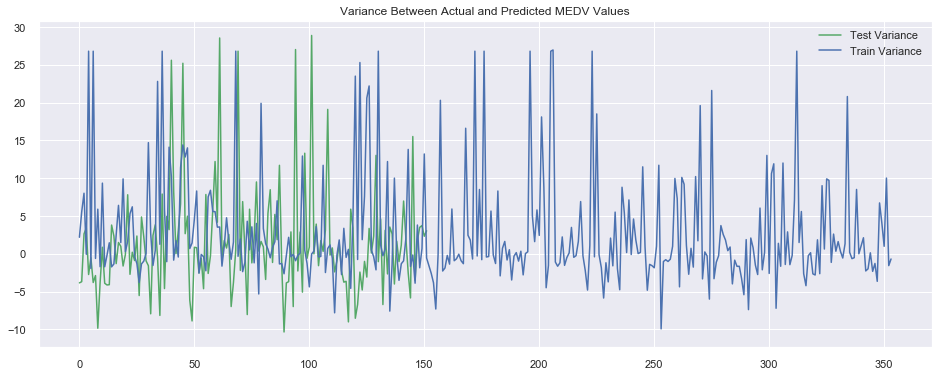

In [367]:
# Predict and relay the scores
wpred3 = wm3.predict(x_test)
wpredt3 = wm3.predict(x_train)
wscore3 = np.sqrt(metrics.mean_squared_error(wpred3, y_test))
wscoret3 = np.sqrt(metrics.mean_squared_error(wpredt3, y_train))
print("Whitened Model 3 (All Data): Test score =", np.round(wscore3,2), "(Training score =",np.round(wscoret3,2),")")
vPlot(wpred3,wpredt3)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


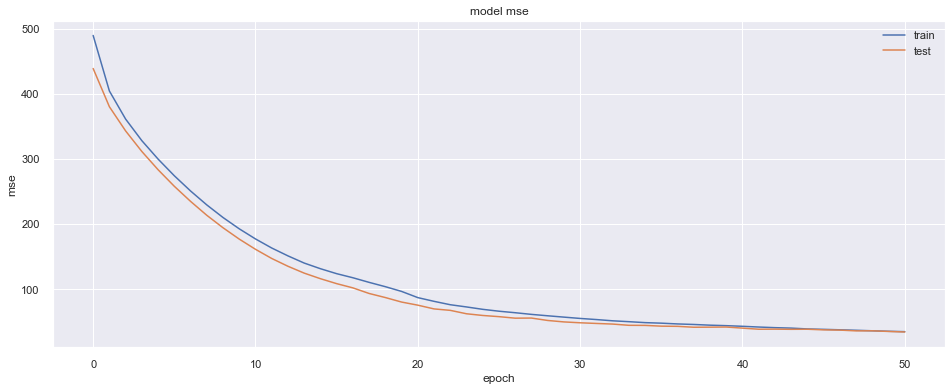

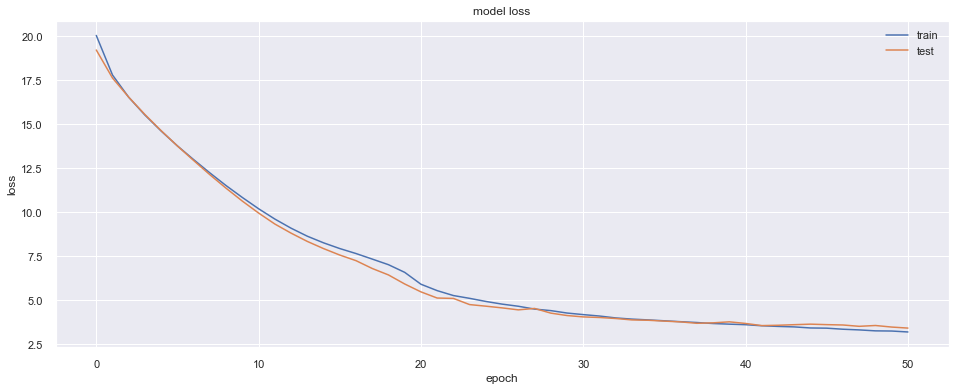

In [342]:
# list all data in history
print(whistory3.history.keys())
# summarize history for mean squared error
plt.plot(whistory3.history["mse"], label = "train")
plt.plot(whistory3.history["val_mse"], label = "test")
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()
# summarize history for loss
plt.plot(whistory3.history["loss"], label = "train")
plt.plot(whistory3.history["val_loss"], label = "test")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

#### 4.5.3 Raw Data
Now look at those employing raw data using nadam optimisers, elu, tanh and softplus activations and 3 and 4 inputs.

We have also included a hidden layer in the neural network.

In [343]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Raw Model 1
noParams = 4
pre_process = "raw"
act1 = "elu"
act2 = "tanh"
opt = "nadam"

# Create our model
rm1 = models.Sequential()
    
# Increasing units and adding a hidden layer
rm1.add(layers.Dense(50, input_dim=noParams, activation = act1))
rm1.add(layers.Dense(25, activation = act2))
# Output layer - linear as it is a regression
rm1.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
rm1.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
rhistory1 = rm1.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 1s 3ms/step - loss: 19.7513 - mse: 469.2509 - val_loss: 18.3331 - val_mse: 451.2558
Epoch 2/200
247/247 [==============================] - 0s 194us/step - loss: 15.9524 - mse: 334.2233 - val_loss: 16.7694 - val_mse: 394.2328
Epoch 3/200
247/247 [==============================] - 0s 178us/step - loss: 14.5761 - mse: 289.9195 - val_loss: 15.4692 - val_mse: 350.4164
Epoch 4/200
247/247 [==============================] - 0s 194us/step - loss: 13.3240 - mse: 253.4105 - val_loss: 14.2632 - val_mse: 311.9017
Epoch 5/200
247/247 [==============================] - 0s 206us/step - loss: 12.1481 - mse: 221.1377 - val_loss: 13.1593 - val_mse: 277.7220
Epoch 6/200
247/247 [==============================] - 0s 177us/step - loss: 11.0446 - mse: 192.6063 - val_loss: 12.1583 - val_mse: 247.7591
Epoch 7/200
247/247 [==============================] - 0s 194us/step - loss: 10.0424 - mse: 168.5071 - val_los

In [344]:
rm1.evaluate(x_test,y_test)

152/152 [==============================] - 0s 46us/step


[4.364091998652408, 43.87856674194336]

Raw Model 1 (All Data): Test score = 6.62 (Training score = 7.91 )


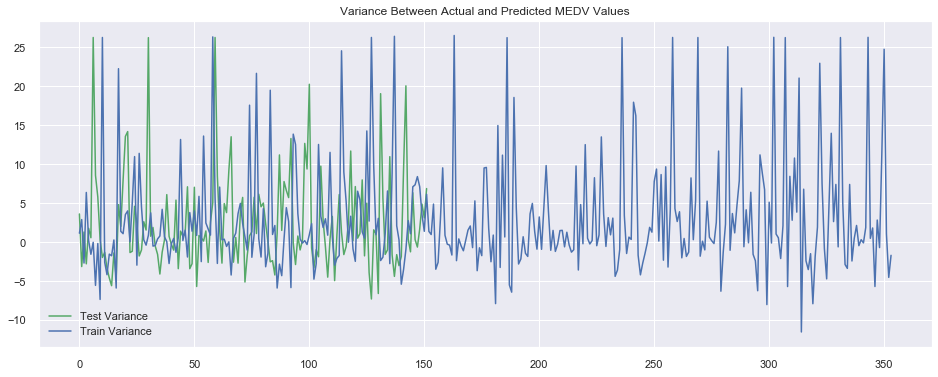

In [345]:
# Predict and relay the scores
rpred1 = rm1.predict(x_test)
rpredt1 = rm1.predict(x_train)
rscore1 = np.sqrt(metrics.mean_squared_error(rpred1, y_test))
rscoret1 = np.sqrt(metrics.mean_squared_error(rpredt1, y_train))
print("Raw Model 1 (All Data): Test score =", np.round(rscore1,2), "(Training score =",np.round(rscoret1,2),")")
vPlot(rpred1,rpredt1)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


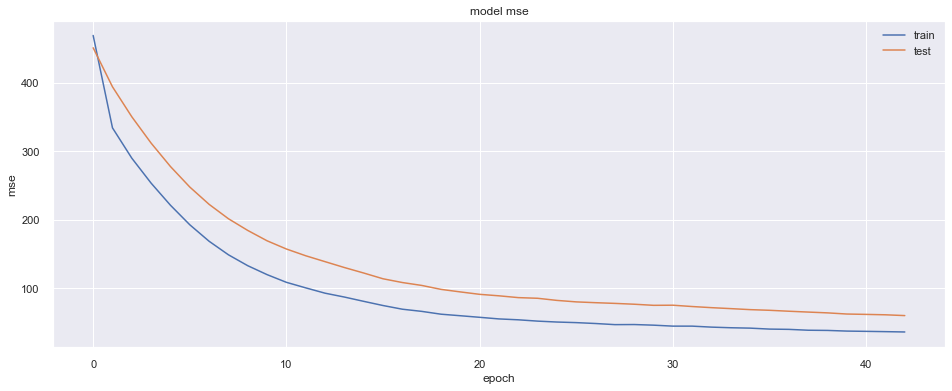

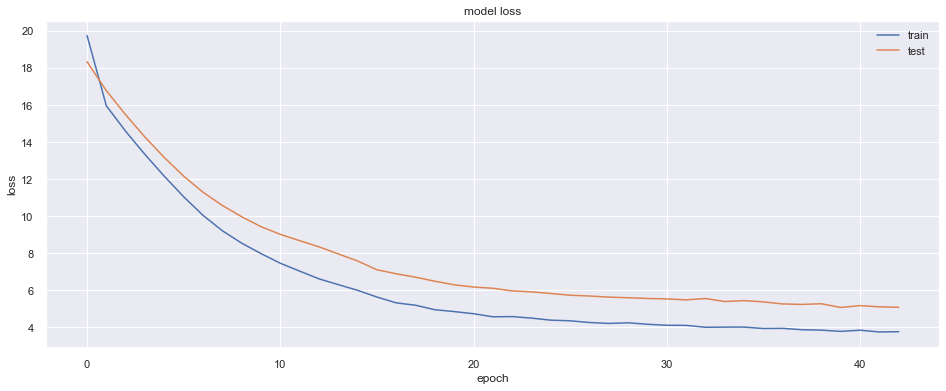

In [346]:
# list all data in history
print(rhistory1.history.keys())
# summarize history for mean squared error
plt.plot(rhistory1.history["mse"], label = "train")
plt.plot(rhistory1.history["val_mse"], label = "test")
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()
# summarize history for loss
plt.plot(rhistory1.history["loss"], label = "train")
plt.plot(rhistory1.history["val_loss"], label = "test")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

In [347]:
# Test / Train Split - setting it to 30% being kept aside for evalaution / testing
testSize = 0.3
noEpoch= 200 # Increased from 100 of earlier
batchSize = 10

# Adding an early stop here
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 1,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear", "softplus"]
opts= ["sgd", "adam", "nadam"]

# Raw Model 2
noParams = 3
pre_process = "raw"
act1 = "elu"
act2 = "tanh"
opt = "nadam"

# Create our model
rm2 = models.Sequential()
    
# Increasing units and adding a hidden layer
rm2.add(layers.Dense(50, input_dim=noParams, activation = act1))
rm2.add(layers.Dense(25, activation = act2))
# Output layer - linear as it is a regression
rm2.add(layers.Dense(1, activation="linear"))
    
# Defining our loss calculations
rm2.compile(loss = "mean_absolute_error", optimizer =opt, metrics=['mse'])

x = getInputs(noParams)
# Split into training and testing data without seeding
splitDS(x, False)
# Scale if it is called for
if pre_process  == "scaled":
    # Scale both the training and test datsets
    x_train = scaleDS(x_train)
    x_test = scaleDS(x_test)
    x = scaleDS(x)
elif pre_process == "whitened":
    x_train = whiten(noParams, x_train)
    x_test = whiten(noParams, x_test)
    x = whiten(noParams, x)
elif pre_process == "both":
    x_train = whiten(noParams, pd.DataFrame(scaleDS(x_train), columns = params[:noParams]))
    x_test = whiten(noParams,  pd.DataFrame(scaleDS(x_test), columns = params[:noParams]))
    x = whiten(noParams,  pd.DataFrame(scaleDS(x), columns = params[:noParams]))

# Train the model
rhistory2 = rm2.fit(x_train, y_train, validation_split=0.3, epochs=noEpoch, batch_size=batchSize, callbacks = [earlystop])
    

Train on 247 samples, validate on 107 samples
Epoch 1/200
247/247 [==============================] - 1s 2ms/step - loss: 18.8141 - mse: 445.2094 - val_loss: 15.3531 - val_mse: 302.4229
Epoch 2/200
247/247 [==============================] - 0s 170us/step - loss: 15.3336 - mse: 324.7506 - val_loss: 13.7825 - val_mse: 259.2914
Epoch 3/200
247/247 [==============================] - 0s 200us/step - loss: 14.0869 - mse: 285.1412 - val_loss: 12.5675 - val_mse: 225.4200
Epoch 4/200
247/247 [==============================] - 0s 182us/step - loss: 12.9527 - mse: 251.3797 - val_loss: 11.4319 - val_mse: 195.5029
Epoch 5/200
247/247 [==============================] - 0s 171us/step - loss: 11.8918 - mse: 221.8503 - val_loss: 10.3460 - val_mse: 169.5171
Epoch 6/200
247/247 [==============================] - 0s 194us/step - loss: 10.9153 - mse: 195.6951 - val_loss: 9.3083 - val_mse: 147.0367
Epoch 7/200
247/247 [==============================] - 0s 204us/step - loss: 10.0382 - mse: 173.3539 - val_loss

In [348]:
rm2.evaluate(x_test,y_test)

152/152 [==============================] - 0s 59us/step


[4.0454937031394556, 41.5417366027832]

Raw Model 2 (All Data): Test score = 6.45 (Training score = 6.24 )


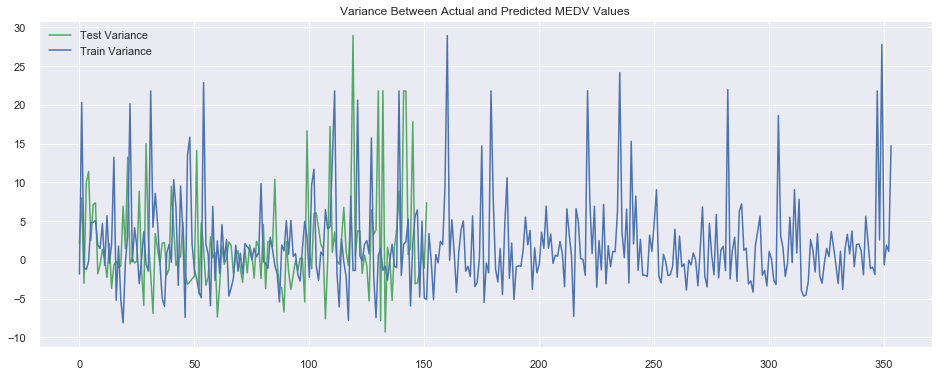

In [349]:
# Predict and relay the scores
rpred2 = rm2.predict(x_test)
rpredt2 = rm2.predict(x_train)
rscore2 = np.sqrt(metrics.mean_squared_error(rpred2, y_test))
rscoret2 = np.sqrt(metrics.mean_squared_error(rpredt2, y_train))
print("Raw Model 2 (All Data): Test score =", np.round(rscore2,2), "(Training score =",np.round(rscoret2,2),")")
vPlot(rpred2,rpredt2)

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


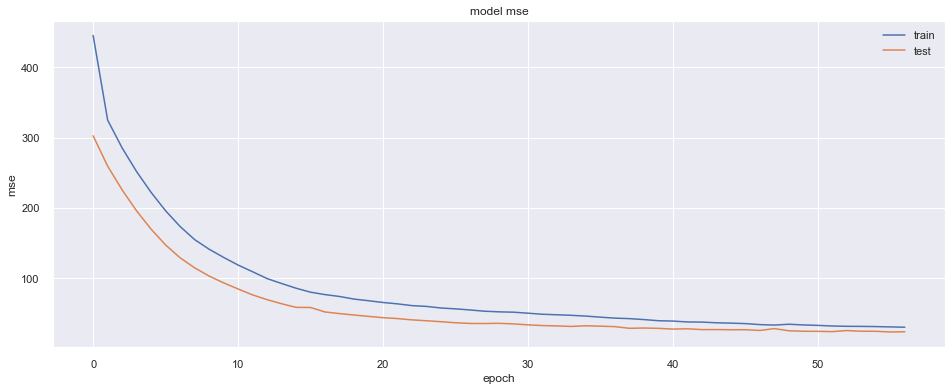

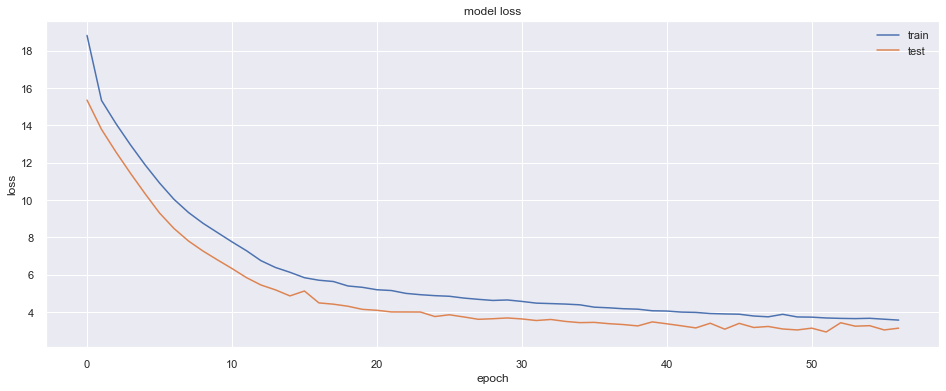

In [350]:
# list all data in history
print(rhistory2.history.keys())
# summarize history for mean squared error
plt.plot(rhistory2.history["mse"], label = "train")
plt.plot(rhistory2.history["val_mse"], label = "test")
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()
# summarize history for loss
plt.plot(rhistory2.history["loss"], label = "train")
plt.plot(rhistory2.history["val_loss"], label = "test")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

In [351]:
min(rhistory2.history["loss"])

3.5699216749986658

So, that is a lot of models created there. Let's summarise them in a dataframe and a few plots.

In [352]:
modName = ["sm1", "bm1", "bm2", "wm1", "wm2", "wm3", "rm1", "rm2" ]
dfPredResults = pd.DataFrame(modName, columns = ["model_name"]) 
dfPredResults["test_score"] = [sscore1, bscore1, bscore2, wscore1, wscore2, wscore3, rscore1, rscore2]
dfPredResults["train_score"] = [sscoret1, bscoret1, bscoret2, wscoret1, wscoret2, wscoret3, rscoret1, rscoret2]
dfPredResults["min_test_loss"] = [min(shistory1.history["val_loss"]), min(bhistory1.history["val_loss"]), min(bhistory2.history["val_loss"]), min(whistory1.history["val_loss"]), min(whistory2.history["val_loss"]), min(whistory3.history["val_loss"]), min(rhistory1.history["val_loss"]), min(rhistory2.history["val_loss"])]
dfPredResults["min_train_loss"] = [min(shistory1.history["loss"]), min(bhistory1.history["loss"]), min(bhistory2.history["loss"]), min(whistory1.history["loss"]), min(whistory2.history["loss"]), min(whistory3.history["loss"]), min(rhistory1.history["loss"]), min(rhistory2.history["loss"])]
dfPredResults["min_test_mse"] = [min(shistory1.history["val_mse"]), min(bhistory1.history["val_mse"]), min(bhistory2.history["val_mse"]), min(whistory1.history["val_mse"]), min(whistory2.history["val_mse"]), min(whistory3.history["val_mse"]), min(rhistory1.history["val_mse"]), min(rhistory2.history["val_mse"])]
dfPredResults["min_train_mse"] = [min(shistory1.history["mse"]), min(bhistory1.history["mse"]), min(bhistory2.history["mse"]), min(whistory1.history["mse"]), min(whistory2.history["mse"]), min(whistory3.history["mse"]), min(rhistory1.history["mse"]), min(rhistory2.history["mse"])]

In [353]:
dfPredResults#.set_index("Model Name")

model_name  test_score  train_score  min_test_loss  min_train_loss  \
0        sm1    8.194301     6.663856       2.832300        2.588651   
1        bm1   13.131725     6.918199       3.237550        3.441481   
2        bm2   11.063128    11.010767       2.332380        1.879973   
3        wm1    6.294638     4.879855       3.031577        2.246411   
4        wm2    6.759341     4.677749       2.958470        2.439768   
5        wm3    7.667521     7.192414       3.422449        3.201555   
6        rm1    6.624089     7.905648       5.066845        3.743239   
7        rm2    6.445288     6.242795       2.934373        3.569922   

   min_test_mse  min_train_mse  
0     24.009459      21.500580  
1     25.784994      31.186295  
2     17.025455       7.414977  
3     22.538589      11.258149  
4     18.232668      12.248146  
5     33.813705      34.306892  
6     59.875954      35.932686  
7     23.263187      29.969589

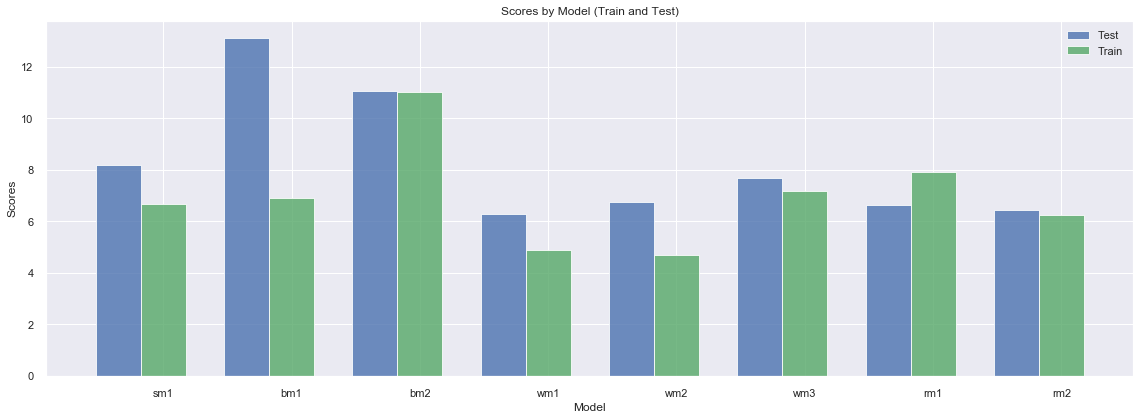

In [354]:
# create plot
fig, ax = plt.subplots()
index = np.arange(len(dfPredResults.model_name))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, dfPredResults.test_score, bar_width,
alpha=opacity,
color="b",
label="Test")

rects2 = plt.bar(index + bar_width, dfPredResults.train_score, bar_width,
alpha=opacity,
color="g",
label="Train")

plt.xlabel("Model")
plt.ylabel("Scores")
plt.title('Scores by Model (Train and Test)')
plt.xticks(index + bar_width, dfPredResults.model_name)
plt.legend()

plt.tight_layout()
plt.show()

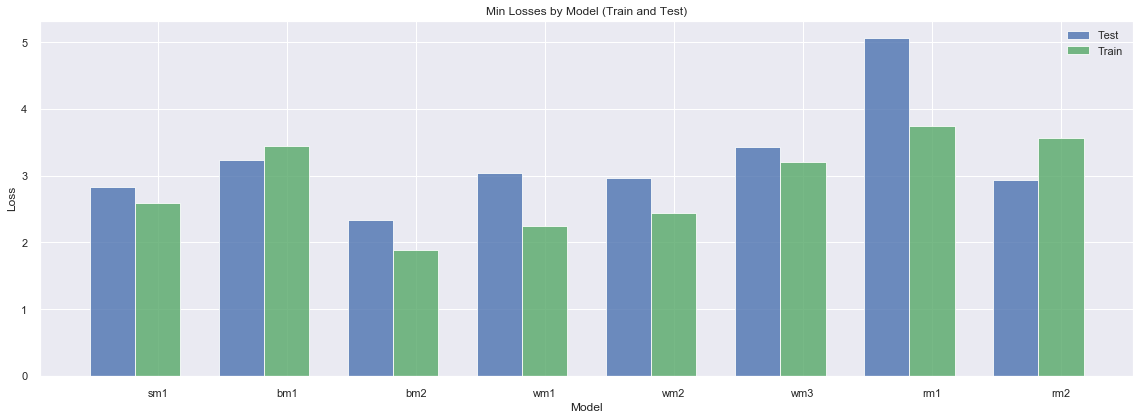

In [355]:
# create plot
fig, ax = plt.subplots()
index = np.arange(len(dfPredResults.model_name))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, dfPredResults.min_test_loss, bar_width,
alpha=opacity,
color="b",
label="Test")

rects2 = plt.bar(index + bar_width, dfPredResults.min_train_loss, bar_width,
alpha=opacity,
color="g",
label="Train")

plt.xlabel("Model")
plt.ylabel("Loss")
plt.title('Min Losses by Model (Train and Test)')
plt.xticks(index + bar_width, dfPredResults.model_name)
plt.legend()

plt.tight_layout()
plt.show()

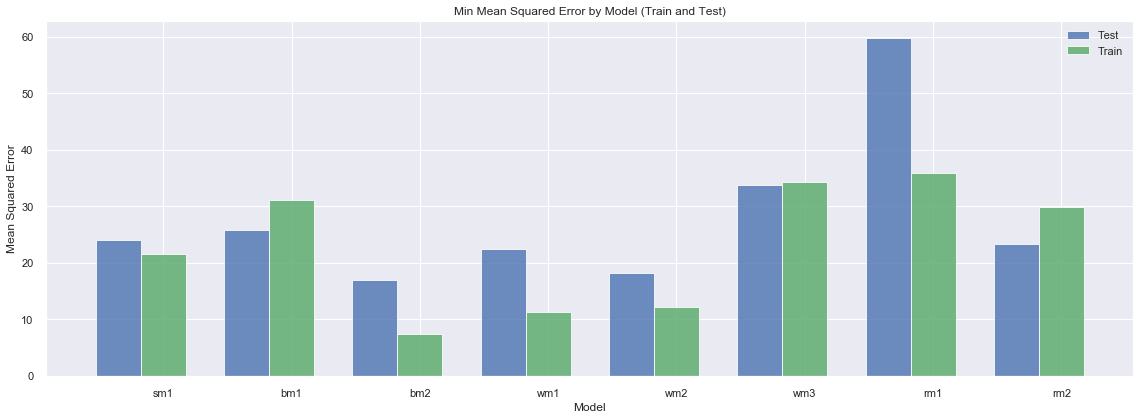

In [356]:
# create plot
fig, ax = plt.subplots()
index = np.arange(len(dfPredResults.model_name))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, dfPredResults.min_test_mse, bar_width,
alpha=opacity,
color="b",
label="Test")

rects2 = plt.bar(index + bar_width, dfPredResults.min_train_mse, bar_width,
alpha=opacity,
color="g",
label="Train")

plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title('Min Mean Squared Error by Model (Train and Test)')
plt.xticks(index + bar_width, dfPredResults.model_name)
plt.legend()

plt.tight_layout()
plt.show()

We can see that all models chosen performed reasonably well with a maximum loss of just 5. There is room for improvement on them too with tweaking the layers, epochs, etc. The second scaled and whitened model marginally outperformed the other models in this group at the time of writing. Note there is no seeding applied to these groups so if this was run again, the results may be different.  

All of these models were also run on the full dataset including those capped at \\$50K. It is likely that the predictions could improve based on a reduced dataset.

## 5. Conclusion <a name="conc"></a>

The Boston House Prices dataset was a good learning dataset in that it was inherently flawed as no doubt all real world datasets are. The assumed ceiling on the MEDV values cast a shadow on analysis you could perform and reinforces the data analysis methodology of doing exploratory analysis first. If you had skipped this and went straight on to perform t-teast etc you may have missed this nugget of information.  

I decided to continue my analysis on the full dataset however as while this dataset it appeared clear, we still do not know for sure it was actually capped. In other larger datasets, the inherent flaws may not be so obvious and any machine learning techniques need to take these into consideration. Also, assuming there was the \\$50K cap, it would be likely that this was on each house value as opposed to just the areas where the median value was  in excess of \\$50K. This would have a possible effect on all housing values.  

The vast array of possible variations in putting together a neural network can be daunting. Using the sledgehammer approach of trying out each possible variation of a number of parameters, we could really hone in on a good starting point for  future analysis. As your experience grows in the field some weeding may even be done prior to the sledgehammer. It was a worthwhile exercise however to narrow the field of good options.  


## <a name="refs"></a>6. References ##
Most of the references listed here are general references used as research for this project. Where a specific refernce was used to solve a problem for example, its number is listed in the text / code above.  

[1] Boston Standard Metropolitan Statistical Area. Boston house prices dataset. https://www.kaggle.com/c/boston-housing.  
[2] https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  
[3] https://pypi.org/project/tabulate/  
[4] Tensorflow Installation https://www.youtube.com/channel/UCR1-GEpyOPzT2AO4D_eifdw   
[5] Jeff Heaton Lecture 02-01  
[6] https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column  
[7] [Towards Data Science: My Journey into Deep Learning using Keras](https://towardsdatascience.com/my-journey-into-deeplearning-using-keras-part-1-67cbb50f65e6)  
[8] [PyImageSearch: Regression with Keras](https://www.pyimagesearch.com/2019/01/21/regression-with-keras/)  
[9] [**PyImageSearch: Keras Multiple Inputs and Mixed Data](https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/)  
[10] [**Data Camp: Keras Tutorial - Deep Learning Python Tutorial](https://www.datacamp.com/community/tutorials/deep-learning-python)  
[11] [** Data Camp: Exploratory Data Analysis with Python](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python)  
[12] [* Towards Data Science: 4 Awesome Things You Can do With Keras](https://towardsdatascience.com/4-awesome-things-you-can-do-with-keras-and-the-code-you-need-to-make-it-happen-858f022eec85)  
[13] [* Towards Data Science: Building a Deep Learning Model Using Keras](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)  
[14] [**Machine Learning Mastery: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)  
[15] [**Towards Data Science: Exploring Activation Functions for Neural Networks](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)  
[16] [**Deep Lizard: Batch Normalisation](https://deeplizard.com/learn/video/dXB-KQYkzNU)  
[17] [You Tube: Machine Learning Tutorial 1 - Linear Regression on Boston Housing Dataset | Machine Learning Basics](https://www.youtube.com/watch?v=ZeM2tHtjGy4)  
[18] [Towards Data Science: How to Increase the Accuracy of a Neural Network](https://towardsdatascience.com/how-to-increase-the-accuracy-of-a-neural-network-9f5d1c6f407d)  
[19] [Statistics by Jim: Multi-co-linearity in regression analysis](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)<a name="19"></a>  
[20] [Stack Overflow: Appending a list or series to a pandas dataframe](https://stackoverflow.com/questions/26309962/appending-a-list-or-series-to-a-pandas-dataframe-as-a-row)<a name = "20"></a>  
[21] [SciPy Docs: numpy percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html#numpy.percentile)<a name = "21"></a>  
[22] [Stack Overflow: Date Ticks Rotation in MatplotLib](https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib)<a name = "22"></a>  
[23] [Scikit Learn: Plot Scaling Importance](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)<a name ="23"></a>  
[24] [Towards Data Science: Scale Standardize or Normalize with SciKit Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)<a name ="24"></a>  
[25] [Investopedia: What Assumptions are Made When Conducting T-Test](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp)<a name="25"></a>  
[26] [Research Gate: The Building Block of Deep Neural Networks Artificial Neuron or Node](https://www.researchgate.net/figure/a-The-building-block-of-deep-neural-networks-artificial-neuron-or-node-Each-input-x_fig1_312205163)<a name="26"></a>  
[27] [Medium: Understanding Overfitting and Underfitting](https://medium.com/analytics-vidhya/understanding-overfitting-and-underfitting-in-machine-learning-2a2f3577fb27)<a name= "27"></a>  
[28] [Python Spot: MatplotLib Bar Chart](https://pythonspot.com/matplotlib-bar-chart/)<a name="28"></a>    

## End